# 🎓 Student Course Completion Prediction

##  Exploratory Data Analysis

---

##  About the Dataset

link https://www.kaggle.com/datasets/nisargpatel344/student-course-completion-prediction-dataset

This dataset provides detailed information about students enrolled in various online courses. It includes demographic, behavioral, and performance features to predict whether a learner will complete the course or drop out.

Designed for data scientists and educational researchers, it enables exploration of learner engagement, success prediction, and dropout analysis.

---

##  Key Details

| Attribute | Value |
|-----------|-------|
| **Rows** | 100,000 |
| **Columns** | 40 |
| **Target Variable** | `Completed` |
| **Status** | Clean and ready for ML use |

---

##  Feature Categories

| Category | Features |
|----------|----------|
| **Demographic** | Gender, Age, Education_Level, Employment_Status |
| **Course Info** | Course_Level, Duration, Instructor_Rating |
| **Engagement** | Login_Frequency, Video_Completion_Rate, Discussion_Participation |
| **Performance** | Assignments_Submitted, Quiz_Score_Avg, Project_Grade, Progress_Percentage |
| **Other** | Payment_Mode, Discount_Used, App_Usage_Percentage |

---

##  Use Cases

-  Predict course completion likelihood
-  Identify factors influencing learner retention
-  Analyze engagement behavior in online learning
-  Build early warning systems for at-risk students
-  Develop data-driven intervention strategies

---

##  Objectives of this EDA

1. **Understand** the distribution and characteristics of student data
2. **Explore** relationships between features and course completion
3. **Identify** key predictors of student success
4. **Discover** actionable insights for improving completion rates
5. **Prepare** the foundation for predictive modeling

---



## Import

In [3]:
!pip install protobuf==3.20.3
import plotly.io as pio
pio.renderers.default = 'kaggle'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, spearmanr, pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import os
import kagglehub

warnings.filterwarnings('ignore')

# Set aesthetic styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.dpi'] = 100

# Custom color palettes
COMPLETION_COLORS = {'Completed': '#2ecc71', 'Not Completed': '#e74c3c'}
GENDER_COLORS = {'Male': '#3498db', 'Female': '#e91e63', 'Other': '#9b59b6'}
CATEGORY_PALETTE = ['#1abc9c', '#3498db', '#9b59b6', '#e74c3c', '#f39c12', '#2c3e50']


## Load The Data

In [4]:
# Download latest version
path = kagglehub.dataset_download("nisargpatel344/student-course-completion-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.37M/4.37M [00:00<00:00, 62.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nisargpatel344/student-course-completion-prediction-dataset/versions/1


In [5]:
print(os.listdir(path))

['Course_Completion_Prediction.csv']


In [6]:
df = pd.read_csv(os.path.join(path,'Course_Completion_Prediction.csv'))

## Data Types & Info

In [8]:
print("="*70)
print(" DATA TYPES SUMMARY")
print("="*70)

# Create a detailed info dataframe
data_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.notnull().sum().values,
    'Null Count': df.isnull().sum().values,
    'Null %': (df.isnull().sum().values / len(df) * 100).round(2),
    'Unique Values': df.nunique().values
})

display(data_info)

print("\n" + "="*70)
print(" DATA TYPES DISTRIBUTION")
print("="*70)
print(df.dtypes.value_counts())

 DATA TYPES SUMMARY


Column Data Type  Non-Null Count  Null Count  \
0                     Student_ID    object          100000           0   
1                           Name    object          100000           0   
2                         Gender    object          100000           0   
3                            Age     int64          100000           0   
4                Education_Level    object          100000           0   
5              Employment_Status    object          100000           0   
6                           City    object          100000           0   
7                    Device_Type    object          100000           0   
8    Internet_Connection_Quality    object          100000           0   
9                      Course_ID    object          100000           0   
10                   Course_Name    object          100000           0   
11                      Category    object          100000           0   
12                  Course_Level    object          100000           0   
13          Course_Duration_Days     int64          100000           0   
14             Instructor_Rating   float64          100000           0   
15               Login_Frequency     int64          100000           0   
16  Average_Session_Duration_Min     int64          100000           0   
17         Video_Completion_Rate   float64          100000           0   
18      Discussion_Participation     int64          100000           0   
19              Time_Spent_Hours   float64          100000           0   
20         Days_Since_Last_Login     int64          100000           0   
21         Notifications_Checked     int64          100000           0   
22        Peer_Interaction_Score   float64          100000           0   
23         Assignments_Submitted     int64          100000           0   
24            Assignments_Missed     int64          100000           0   
25                 Quiz_Attempts     int64          100000           0   
26                Quiz_Score_Avg   float64          100000           0   
27                 Project_Grade   float64          100000           0   
28           Progress_Percentage   float64          100000           0   
29                 Rewatch_Count     int64          100000           0   
30               Enrollment_Date    object          100000           0   
31                  Payment_Mode    object          100000           0   
32                      Fee_Paid    object          100000           0   
33                 Discount_Used    object          100000           0   
34                Payment_Amount     int64          100000           0   
35          App_Usage_Percentage     int64          100000           0   
36       Reminder_Emails_Clicked     int64          100000           0   
37        Support_Tickets_Raised     int64          100000           0   
38           Satisfaction_Rating   float64          100000           0   
39                     Completed    object          100000           0   

    Null %  Unique Values  
0      0.0         100000  
1      0.0            300  
2      0.0              3  
3      0.0             34  
4      0.0              5  
5      0.0              4  
6      0.0             15  
7      0.0              3  
8      0.0              3  
9      0.0              8  
10     0.0              8  
11     0.0              5  
12     0.0              3  
13     0.0              8  
14     0.0              7  
15     0.0             16  
16     0.0             73  
17     0.0            950  
18     0.0             13  
19     0.0            227  
20     0.0             76  
21     0.0             19  
22     0.0            101  
23     0.0             11  
24     0.0             11  
25     0.0             17  
26     0.0            714  
27     0.0            865  
28     0.0            824  
29     0.0             15  
30     0.0            721  
31     0.0              6  
32     0.0              2  
33     0.0              2  
34     0.0 


 DATA TYPES DISTRIBUTION
object     17
int64      15
float64     8
Name: count, dtype: int64


## Statistical Summary

In [9]:
print("="*70)
print("📊 NUMERICAL FEATURES - DESCRIPTIVE STATISTICS")
print("="*70)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n Number of Numerical Features: {len(numerical_cols)}")

display(df[numerical_cols].describe().T.style.background_gradient(cmap='Blues'))

📊 NUMERICAL FEATURES - DESCRIPTIVE STATISTICS

 Number of Numerical Features: 23


## Categorical Summary:

In [10]:
print("="*70)
print(" CATEGORICAL FEATURES - VALUE COUNTS")
print("="*70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Number of Categorical Features: {len(categorical_cols)}")

for col in categorical_cols:
    if col not in ['Student_ID', 'Name', 'Enrollment_Date']:
        print(f"\n{'='*50}")
        print(f" {col}")
        print('='*50)
        print(df[col].value_counts())

 CATEGORICAL FEATURES - VALUE COUNTS

📝 Number of Categorical Features: 17

 Gender
Gender
Female    50187
Male      47819
Other      1994
Name: count, dtype: int64

 Education_Level
Education_Level
Bachelor      54956
Master        21859
HighSchool    10107
Diploma       10032
PhD            3046
Name: count, dtype: int64

 Employment_Status
Employment_Status
Employed         45091
Student          44929
Self-Employed     5067
Unemployed        4913
Name: count, dtype: int64

 City
City
Indore       6747
Delhi        6743
Mumbai       6731
Surat        6722
Nagpur       6707
Bengaluru    6707
Kolkata      6700
Lucknow      6675
Hyderabad    6652
Ahmedabad    6634
Bhopal       6625
Vadodara     6621
Jaipur       6613
Pune         6574
Chennai      6549
Name: count, dtype: int64

 Device_Type
Device_Type
Mobile    60021
Laptop    35018
Tablet     4961
Name: count, dtype: int64

 Internet_Connection_Quality
Internet_Connection_Quality
Medium    49985
High      35002
Low       15013
Name:

## Target Variable Analysis

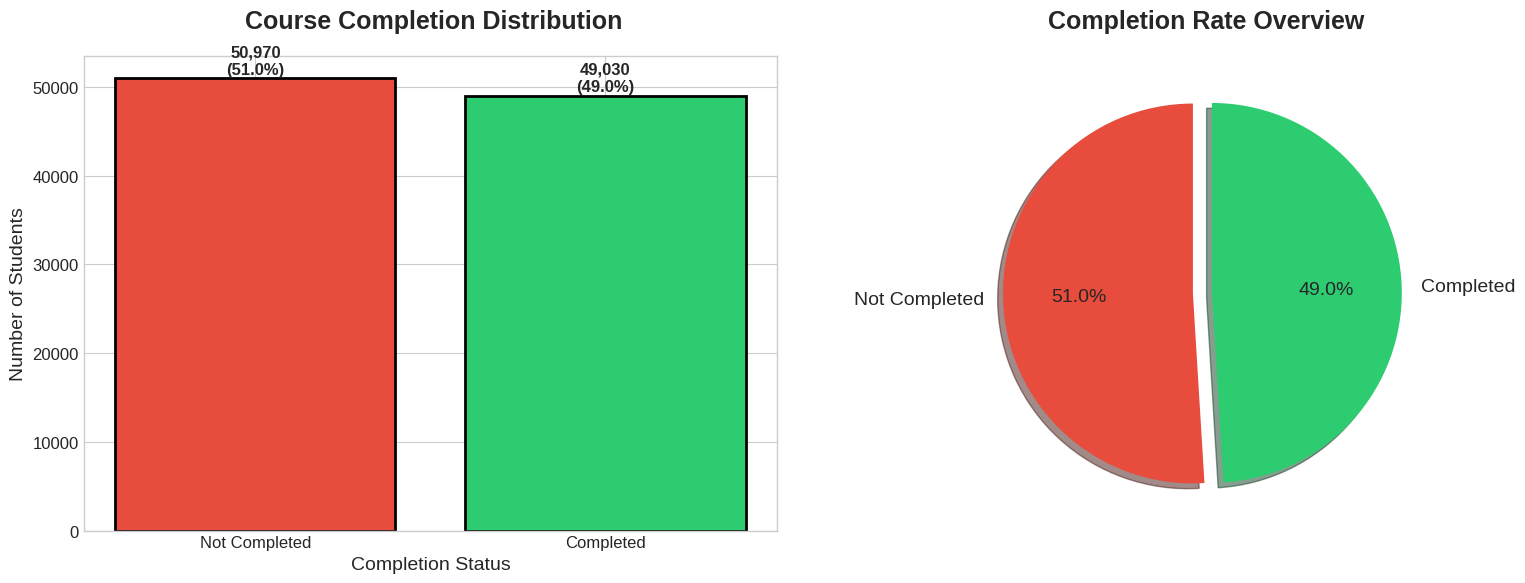


Completion Rate: 49.03%
 Non-Completion Rate: 50.97%


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count Plot
completion_counts = df['Completed'].value_counts()
colors = [COMPLETION_COLORS[x] for x in completion_counts.index]

ax1 = axes[0]
bars = ax1.bar(completion_counts.index, completion_counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title(' Course Completion Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Completion Status', fontsize=14)
ax1.set_ylabel('Number of Students', fontsize=14)

# Add value labels
for bar, val in zip(bars, completion_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'{val:,}\n({val/len(df)*100:.1f}%)', ha='center', fontsize=12, fontweight='bold')

# Pie Chart
ax2 = axes[1]
explode = (0.05, 0.05)
wedges, texts, autotexts = ax2.pie(completion_counts.values, labels=completion_counts.index,
                                    autopct='%1.1f%%', colors=colors, explode=explode,
                                    shadow=True, startangle=90, textprops={'fontsize': 14})
ax2.set_title(' Completion Rate Overview', fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"\nCompletion Rate: {(df['Completed']=='Completed').mean()*100:.2f}%")
print(f" Non-Completion Rate: {(df['Completed']=='Not Completed').mean()*100:.2f}%")

## Demographic Analysis

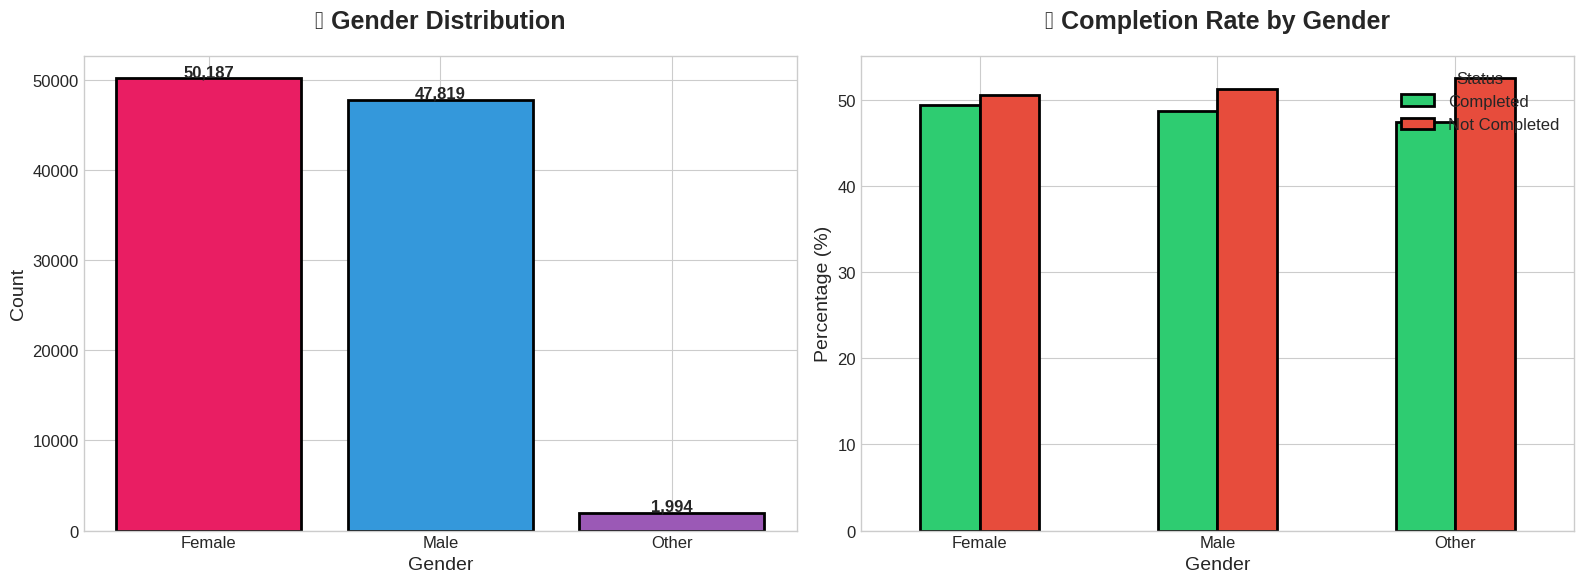

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gender Distribution
ax1 = axes[0]
gender_counts = df['Gender'].value_counts()
colors = [GENDER_COLORS.get(x, '#95a5a6') for x in gender_counts.index]
bars = ax1.bar(gender_counts.index, gender_counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title('👥 Gender Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Gender', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

for bar, val in zip(bars, gender_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}', ha='center', fontsize=12, fontweight='bold')

# Gender vs Completion
ax2 = axes[1]
gender_completion = pd.crosstab(df['Gender'], df['Completed'], normalize='index') * 100
gender_completion.plot(kind='bar', ax=ax2, color=[COMPLETION_COLORS['Completed'], COMPLETION_COLORS['Not Completed']],
                       edgecolor='black', linewidth=2)
ax2.set_title('👥 Completion Rate by Gender', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Gender', fontsize=14)
ax2.set_ylabel('Percentage (%)', fontsize=14)
ax2.legend(title='Status', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('gender_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Age Distribution

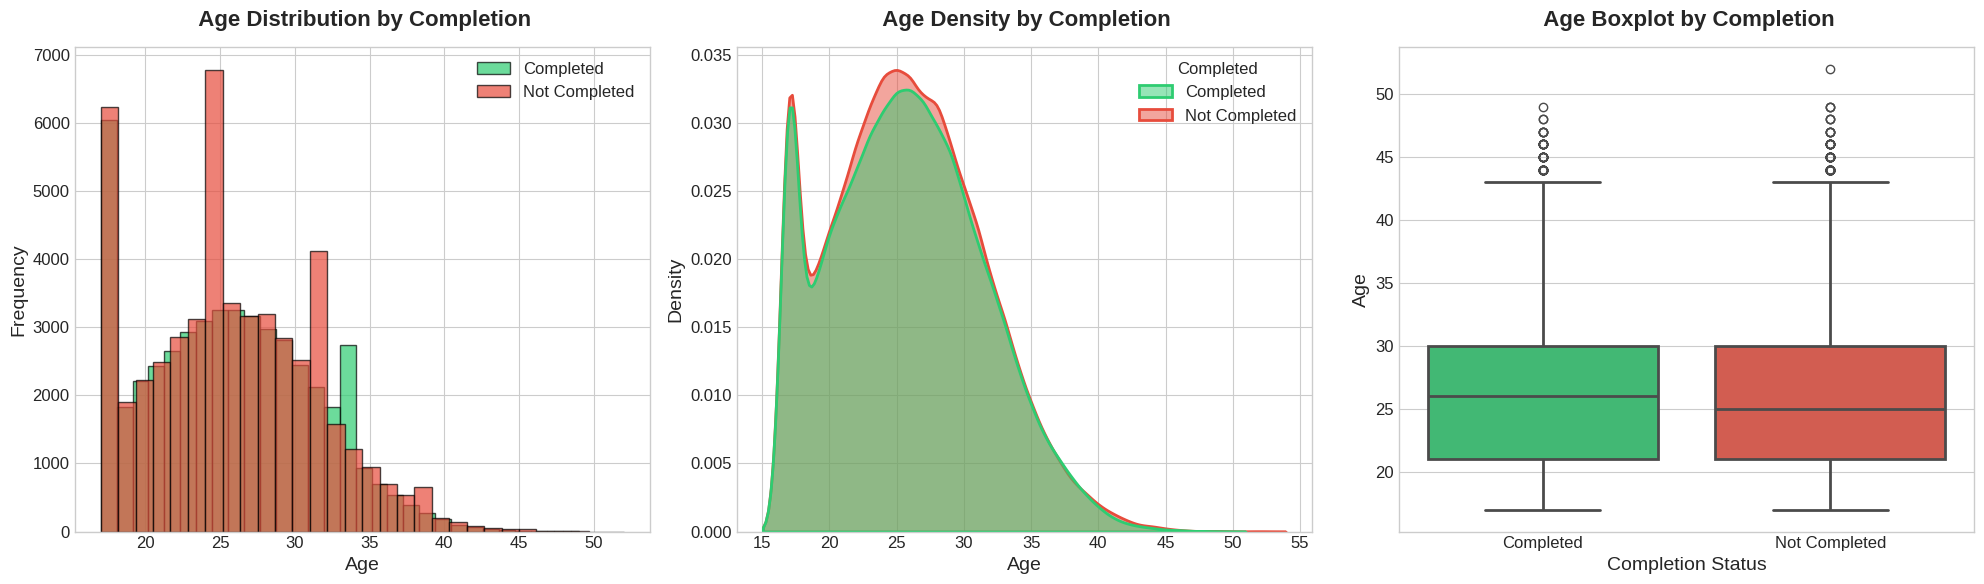


 Age Statistics by Completion Status:
                 count   mean   std   min   25%   50%   75%   max
Completed                                                        
Completed      49030.0  25.71  5.61  17.0  21.0  26.0  30.0  49.0
Not Completed  50970.0  25.71  5.62  17.0  21.0  25.0  30.0  52.0


In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Age Histogram
ax1 = axes[0]
ax1.hist(df[df['Completed']=='Completed']['Age'], bins=30, alpha=0.7, label='Completed',
         color=COMPLETION_COLORS['Completed'], edgecolor='black')
ax1.hist(df[df['Completed']=='Not Completed']['Age'], bins=30, alpha=0.7, label='Not Completed',
         color=COMPLETION_COLORS['Not Completed'], edgecolor='black')
ax1.set_title(' Age Distribution by Completion', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.legend(fontsize=12)

# Age KDE Plot
ax2 = axes[1]
sns.kdeplot(data=df, x='Age', hue='Completed', ax=ax2, fill=True, alpha=0.5,
            palette=COMPLETION_COLORS, linewidth=2)
ax2.set_title(' Age Density by Completion', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Age', fontsize=14)

# Age Boxplot
ax3 = axes[2]
sns.boxplot(data=df, x='Completed', y='Age', palette=COMPLETION_COLORS, ax=ax3, linewidth=2)
ax3.set_title(' Age Boxplot by Completion', fontsize=16, fontweight='bold', pad=15)
ax3.set_xlabel('Completion Status', fontsize=14)
ax3.set_ylabel('Age', fontsize=14)

plt.tight_layout()
plt.savefig('age_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Statistical Summary
print("\n Age Statistics by Completion Status:")
print(df.groupby('Completed')['Age'].describe().round(2))

## Education Level Analysis:

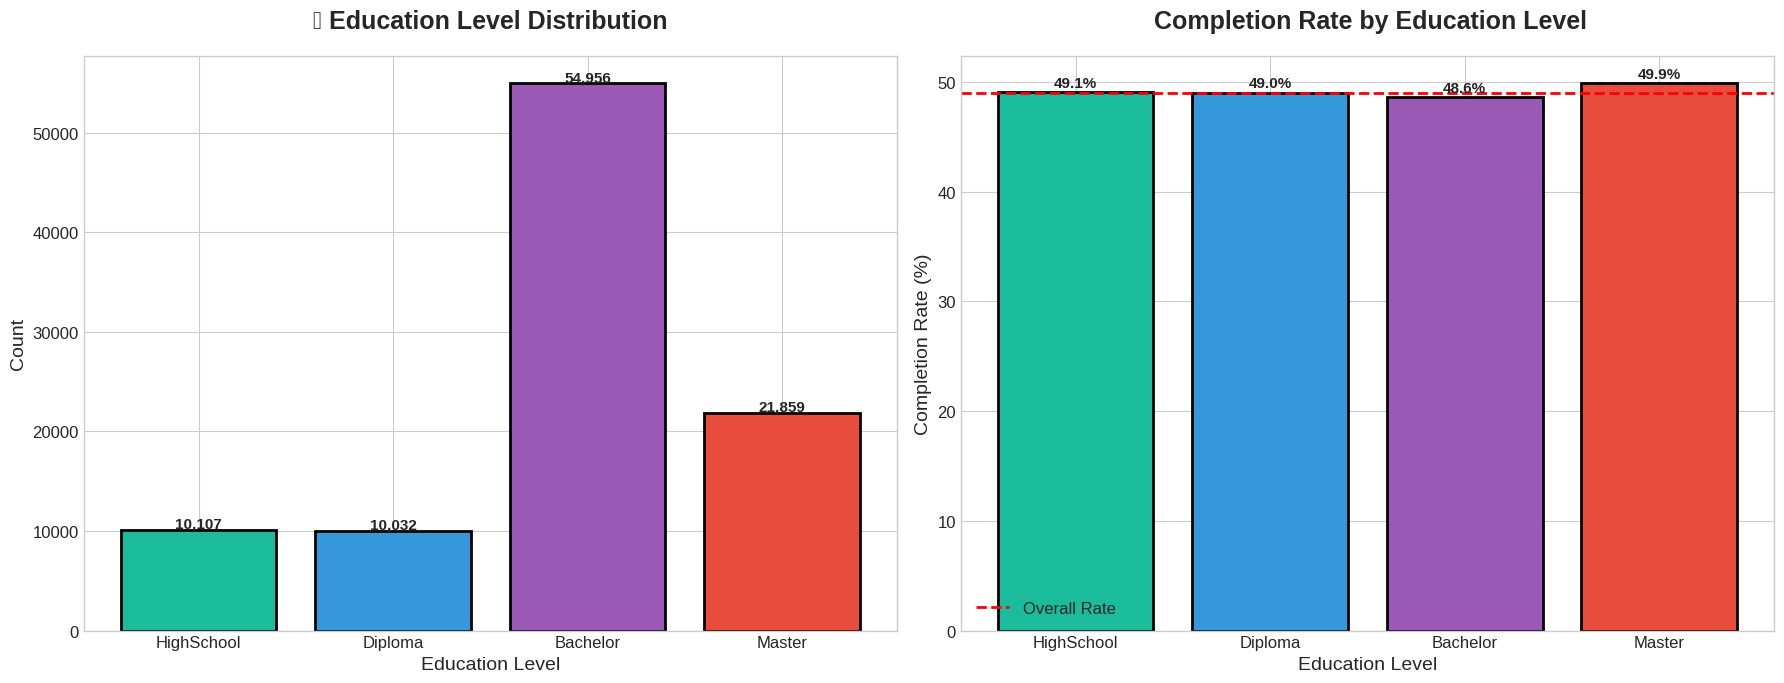

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Education Distribution
education_order = ['HighSchool', 'Diploma', 'Bachelor', 'Master']
ax1 = axes[0]
edu_counts = df['Education_Level'].value_counts().reindex(education_order)
bars = ax1.bar(edu_counts.index, edu_counts.values, color=CATEGORY_PALETTE[:4], edgecolor='black', linewidth=2)
ax1.set_title('🎓 Education Level Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Education Level', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

for bar, val in zip(bars, edu_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}', ha='center', fontsize=11, fontweight='bold')

# Education vs Completion Rate
ax2 = axes[1]
edu_completion = df.groupby('Education_Level')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
).reindex(education_order)
bars = ax2.bar(edu_completion.index, edu_completion.values, color=CATEGORY_PALETTE[:4], edgecolor='black', linewidth=2)
ax2.set_title(' Completion Rate by Education Level', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Education Level', fontsize=14)
ax2.set_ylabel('Completion Rate (%)', fontsize=14)
ax2.axhline(y=(df['Completed']=='Completed').mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Rate')
ax2.legend(fontsize=12)

for bar, val in zip(bars, edu_completion.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('education_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Employment Status Analysis

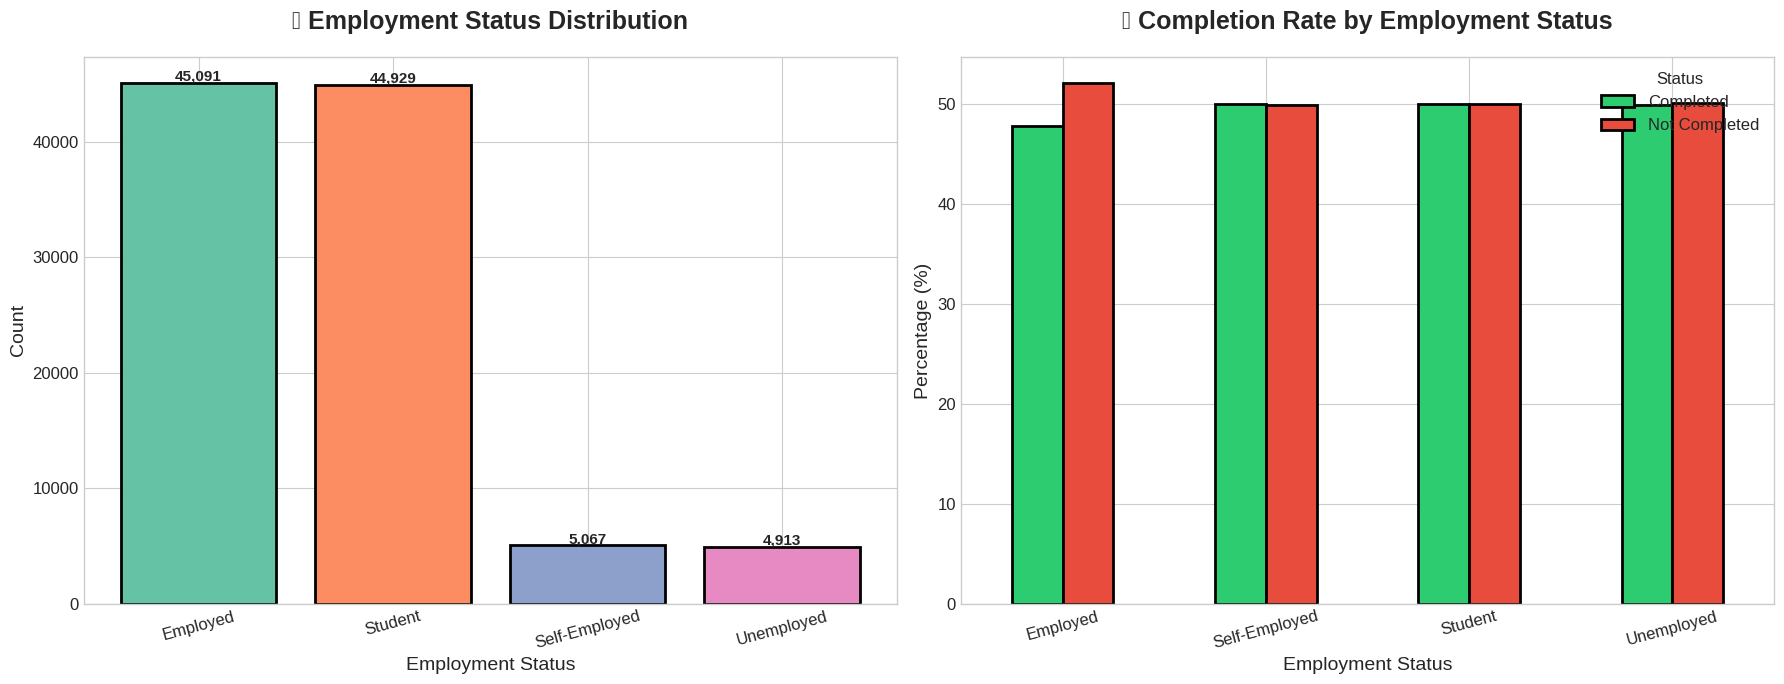

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Employment Distribution
ax1 = axes[0]
emp_counts = df['Employment_Status'].value_counts()
colors = sns.color_palette("Set2", len(emp_counts))
bars = ax1.bar(emp_counts.index, emp_counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title('💼 Employment Status Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Employment Status', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15)

for bar, val in zip(bars, emp_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}', ha='center', fontsize=11, fontweight='bold')

# Employment vs Completion
ax2 = axes[1]
emp_completion = pd.crosstab(df['Employment_Status'], df['Completed'], normalize='index') * 100
emp_completion.plot(kind='bar', ax=ax2, color=[COMPLETION_COLORS['Completed'], COMPLETION_COLORS['Not Completed']],
                    edgecolor='black', linewidth=2)
ax2.set_title('💼 Completion Rate by Employment Status', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Employment Status', fontsize=14)
ax2.set_ylabel('Percentage (%)', fontsize=14)
ax2.legend(title='Status', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15)

plt.tight_layout()
plt.savefig('employment_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Course & Category Analysis

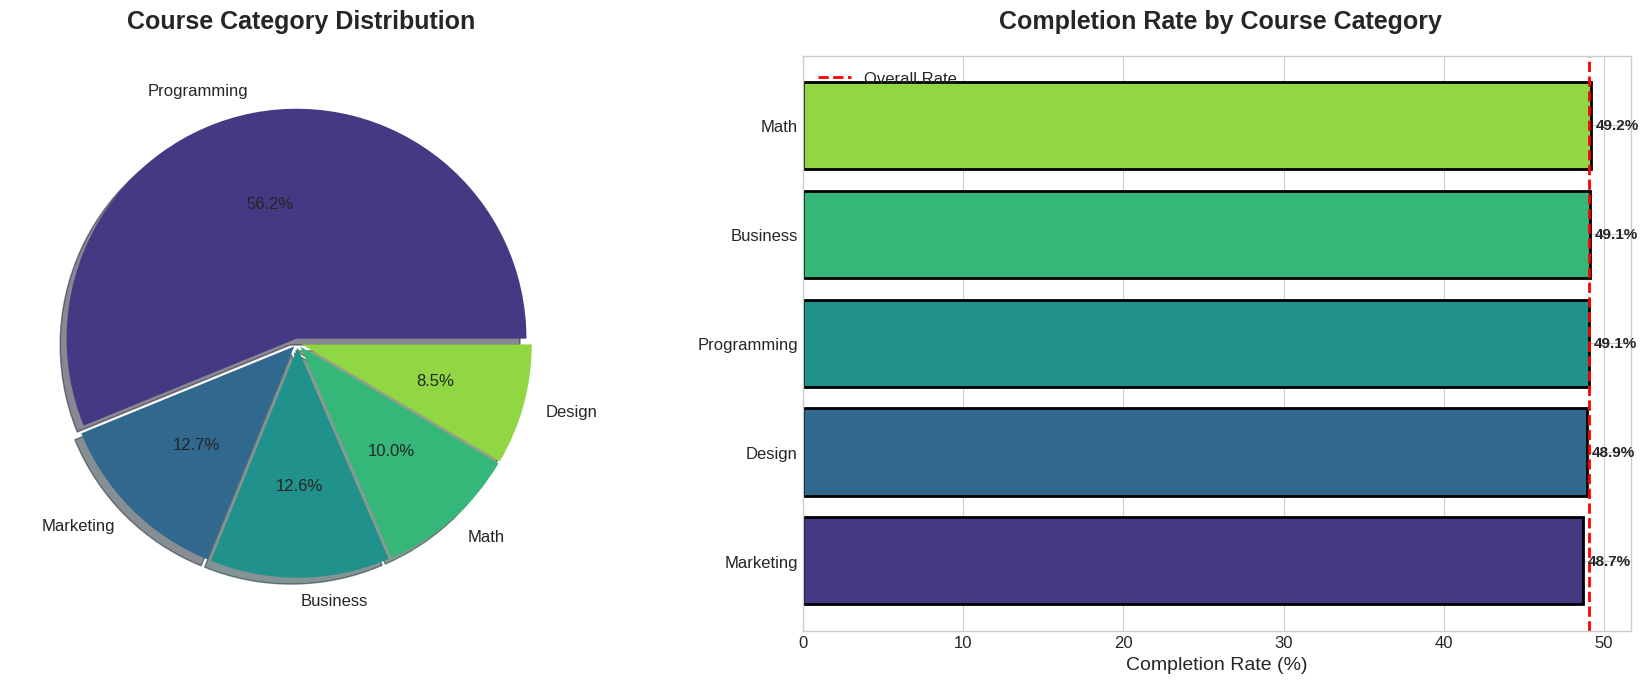

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Category Distribution
ax1 = axes[0]
cat_counts = df['Category'].value_counts()
colors = sns.color_palette("viridis", len(cat_counts))
wedges, texts, autotexts = ax1.pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%',
                                    colors=colors, explode=[0.02]*len(cat_counts), shadow=True,
                                    textprops={'fontsize': 12})
ax1.set_title(' Course Category Distribution', fontsize=18, fontweight='bold', pad=20)

# Completion by Category
ax2 = axes[1]
cat_completion = df.groupby('Category')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
).sort_values(ascending=True)
colors = sns.color_palette("viridis", len(cat_completion))
bars = ax2.barh(cat_completion.index, cat_completion.values, color=colors, edgecolor='black', linewidth=2)
ax2.set_title(' Completion Rate by Course Category', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Completion Rate (%)', fontsize=14)
ax2.axvline(x=(df['Completed']=='Completed').mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Rate')
ax2.legend(fontsize=12)

for bar, val in zip(bars, cat_completion.values):
    ax2.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('category_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Course Level Analysis

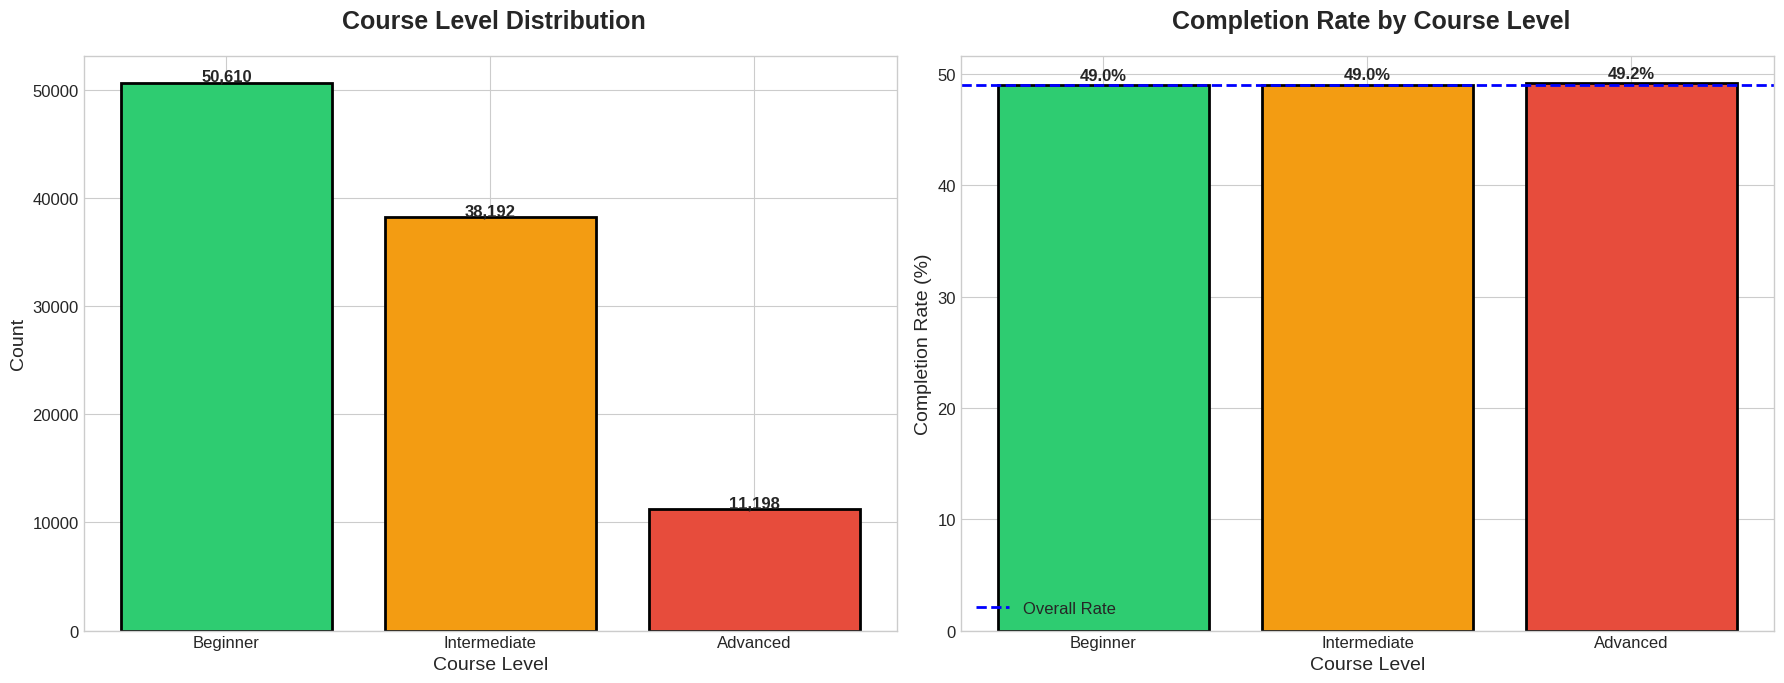

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

level_order = ['Beginner', 'Intermediate', 'Advanced']

# Level Distribution
ax1 = axes[0]
level_counts = df['Course_Level'].value_counts().reindex(level_order)
colors = ['#2ecc71', '#f39c12', '#e74c3c']
bars = ax1.bar(level_counts.index, level_counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title(' Course Level Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Course Level', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

for bar, val in zip(bars, level_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}', ha='center', fontsize=12, fontweight='bold')

# Level vs Completion
ax2 = axes[1]
level_completion = df.groupby('Course_Level')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
).reindex(level_order)
bars = ax2.bar(level_completion.index, level_completion.values, color=colors, edgecolor='black', linewidth=2)
ax2.set_title(' Completion Rate by Course Level', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Course Level', fontsize=14)
ax2.set_ylabel('Completion Rate (%)', fontsize=14)
ax2.axhline(y=(df['Completed']=='Completed').mean()*100, color='blue', linestyle='--', linewidth=2, label='Overall Rate')
ax2.legend(fontsize=12)

for bar, val in zip(bars, level_completion.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('level_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Device & Connectivity Analysis

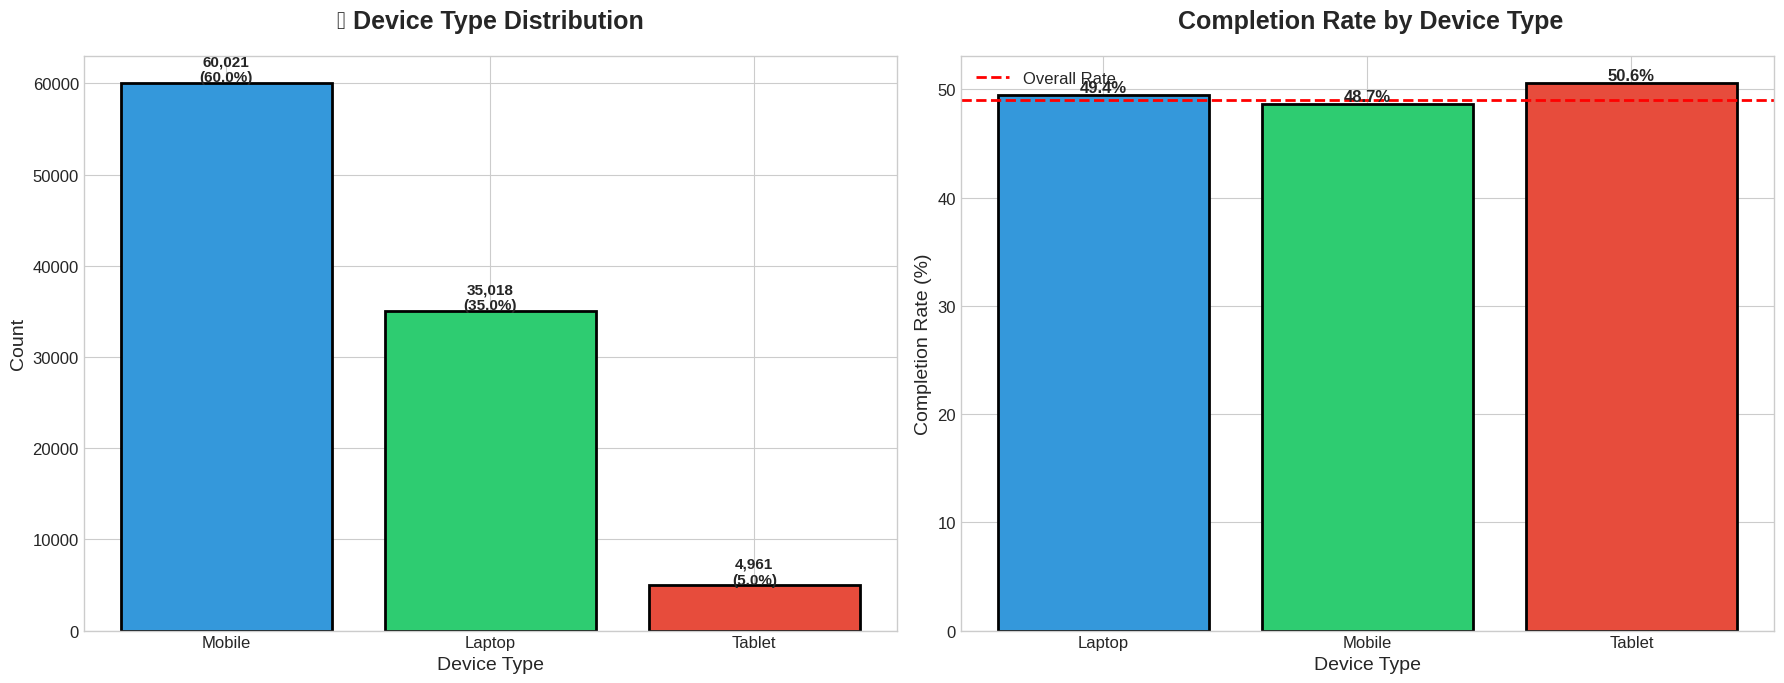

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Device Distribution
ax1 = axes[0]
device_counts = df['Device_Type'].value_counts()
colors = ['#3498db', '#2ecc71', '#e74c3c']
bars = ax1.bar(device_counts.index, device_counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title('📱 Device Type Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Device Type', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

for bar, val in zip(bars, device_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}\n({val/len(df)*100:.1f}%)', ha='center', fontsize=11, fontweight='bold')

# Device vs Completion
ax2 = axes[1]
device_completion = df.groupby('Device_Type')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
)
bars = ax2.bar(device_completion.index, device_completion.values, color=colors, edgecolor='black', linewidth=2)
ax2.set_title(' Completion Rate by Device Type', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Device Type', fontsize=14)
ax2.set_ylabel('Completion Rate (%)', fontsize=14)
ax2.axhline(y=(df['Completed']=='Completed').mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Rate')
ax2.legend(fontsize=12)

for bar, val in zip(bars, device_completion.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('device_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Internet Quality Analysis

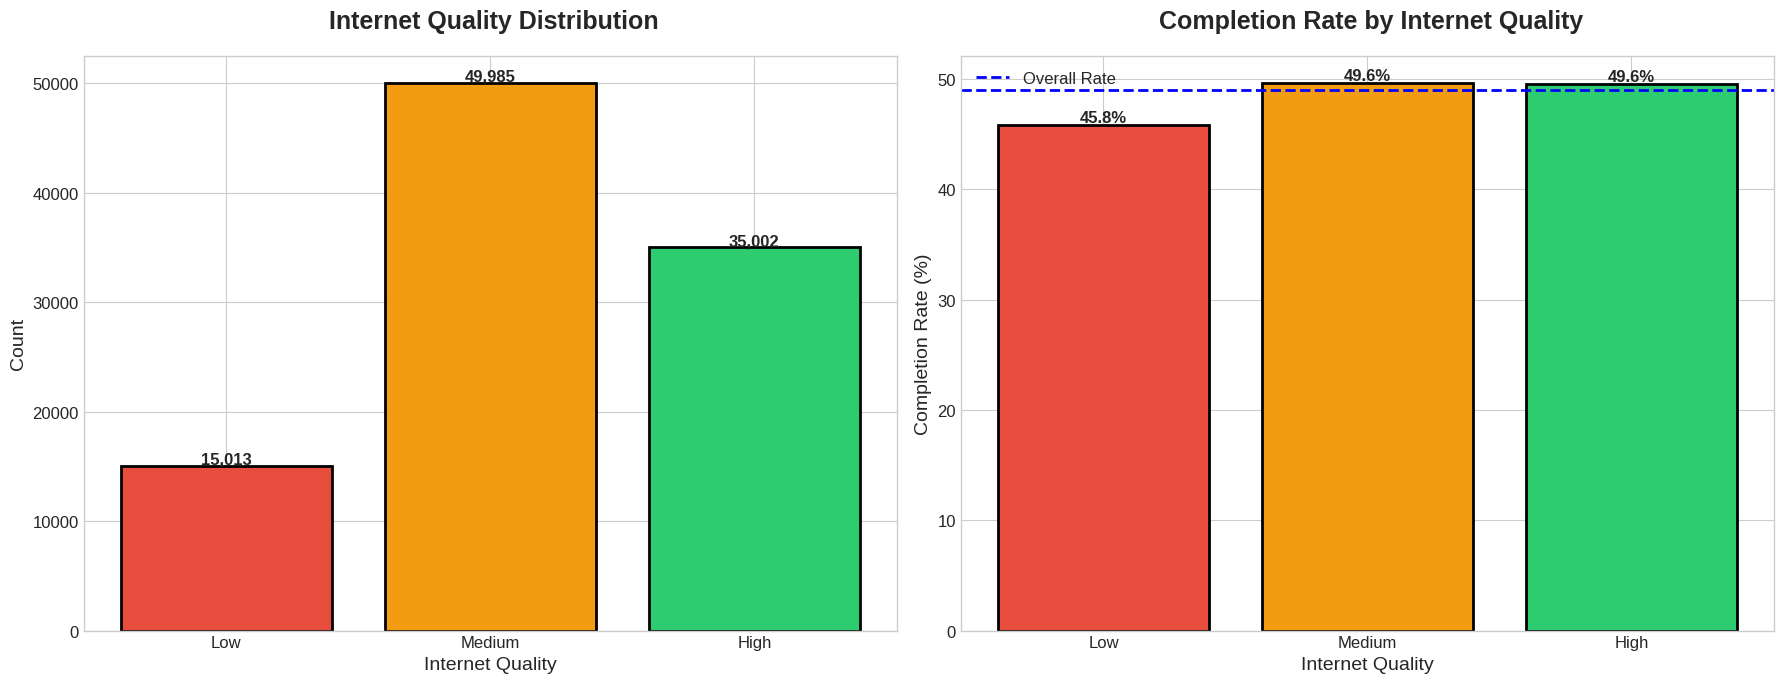

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

quality_order = ['Low', 'Medium', 'High']

# Internet Quality Distribution
ax1 = axes[0]
quality_counts = df['Internet_Connection_Quality'].value_counts().reindex(quality_order)
colors = ['#e74c3c', '#f39c12', '#2ecc71']
bars = ax1.bar(quality_counts.index, quality_counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title(' Internet Quality Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Internet Quality', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

for bar, val in zip(bars, quality_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}', ha='center', fontsize=12, fontweight='bold')

# Internet Quality vs Completion
ax2 = axes[1]
quality_completion = df.groupby('Internet_Connection_Quality')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
).reindex(quality_order)
bars = ax2.bar(quality_completion.index, quality_completion.values, color=colors, edgecolor='black', linewidth=2)
ax2.set_title(' Completion Rate by Internet Quality', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Internet Quality', fontsize=14)
ax2.set_ylabel('Completion Rate (%)', fontsize=14)
ax2.axhline(y=(df['Completed']=='Completed').mean()*100, color='blue', linestyle='--', linewidth=2, label='Overall Rate')
ax2.legend(fontsize=12)

for bar, val in zip(bars, quality_completion.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('internet_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Engagement Metrics Deep Dive

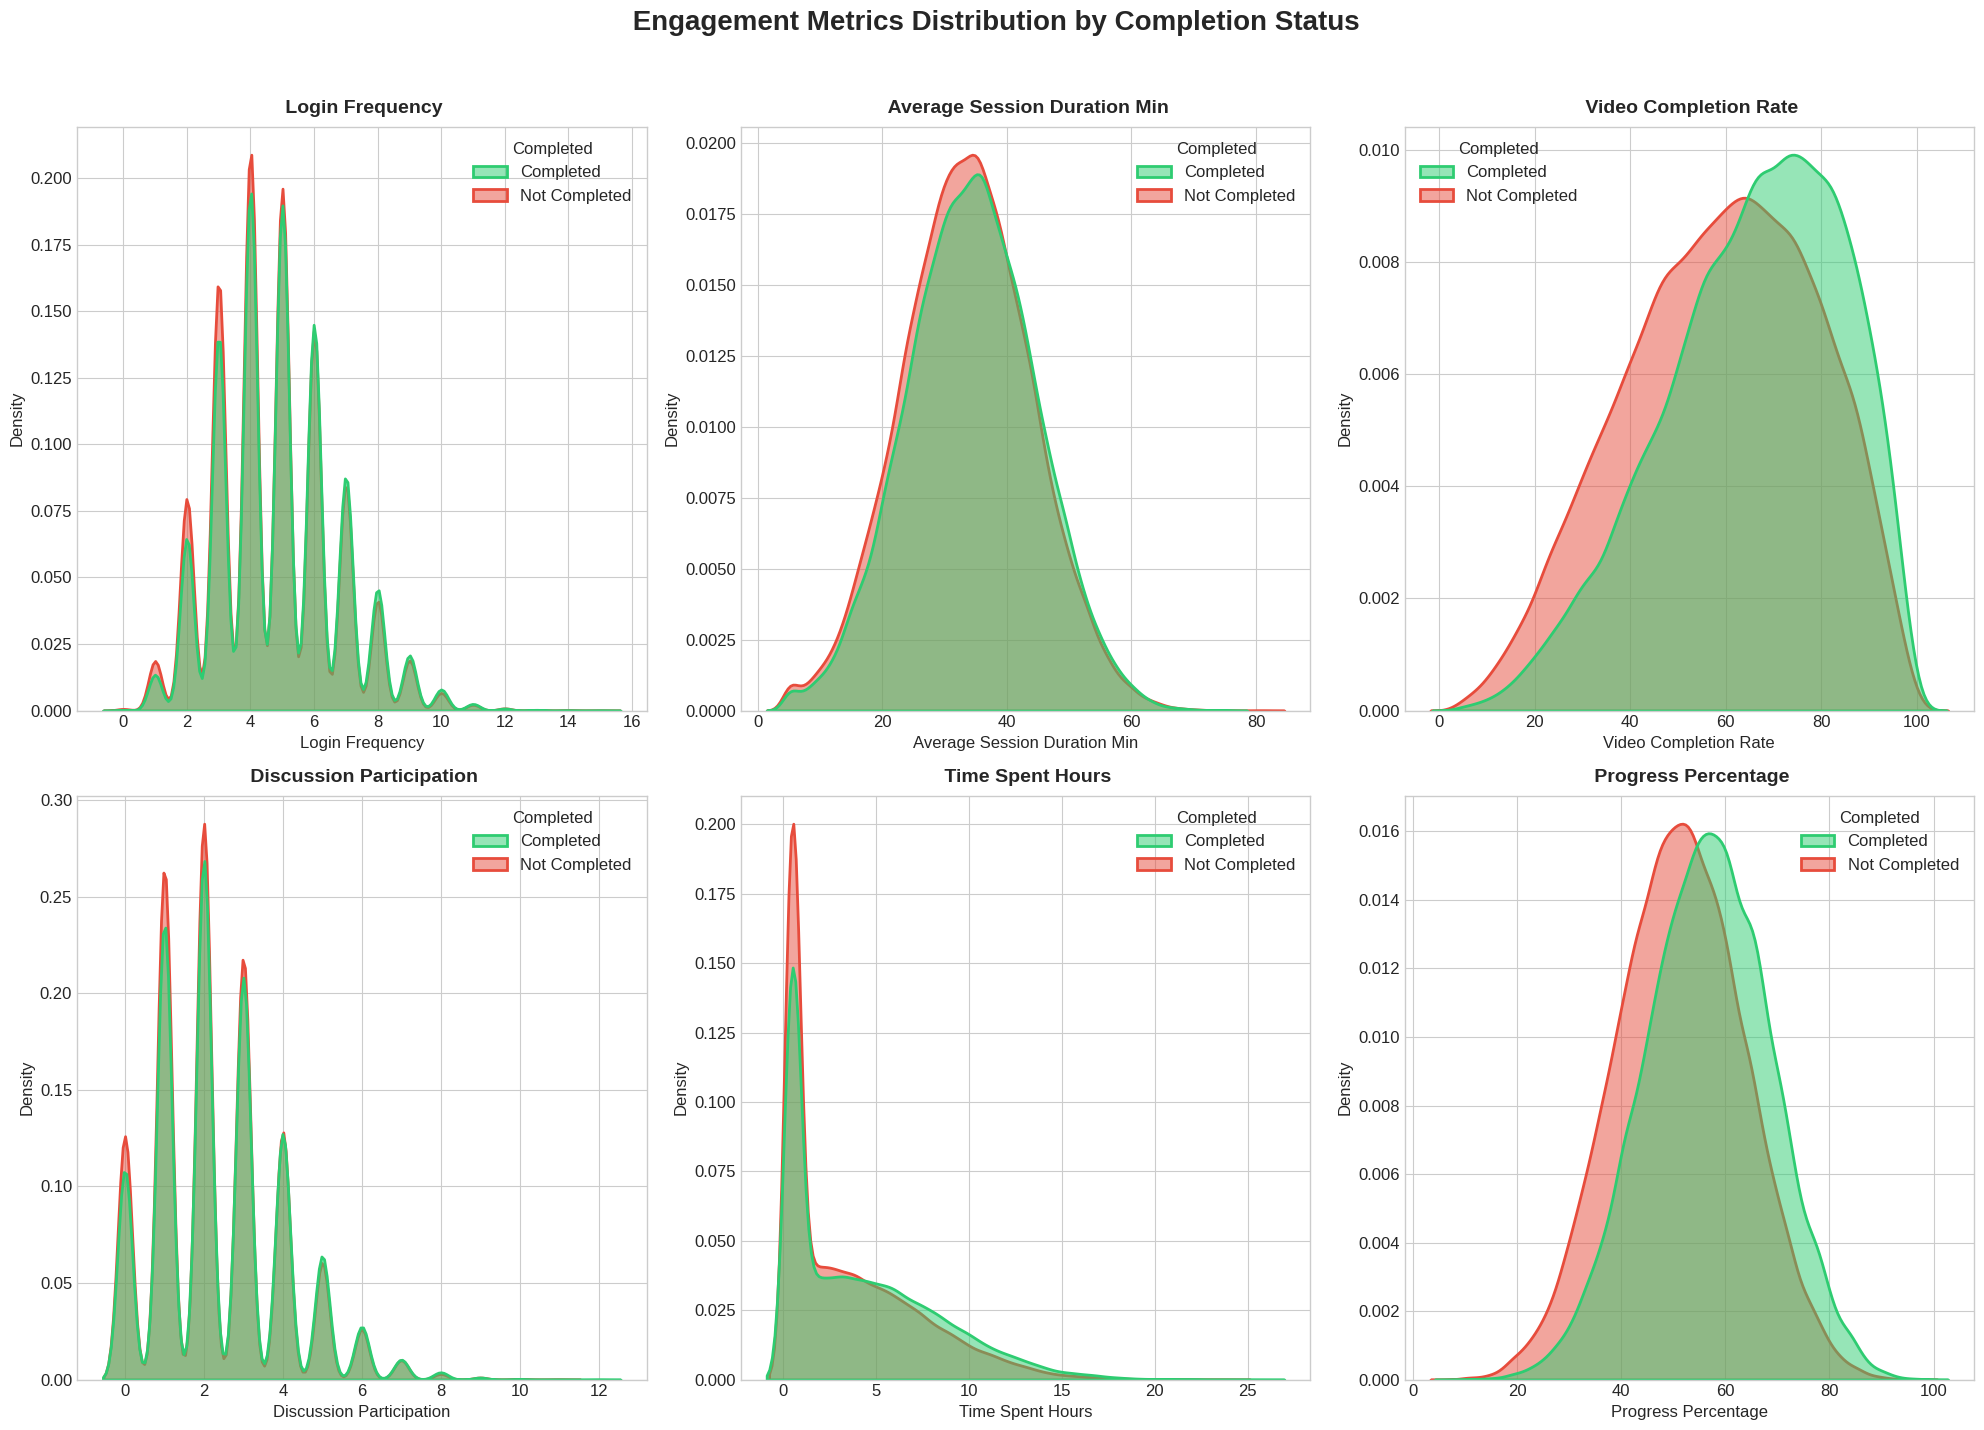

In [20]:
engagement_cols = ['Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate',
                   'Discussion_Participation', 'Time_Spent_Hours', 'Progress_Percentage']

fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

for idx, col in enumerate(engagement_cols):
    ax = axes[idx]

    # KDE plot
    sns.kdeplot(data=df, x=col, hue='Completed', ax=ax, fill=True, alpha=0.5,
                palette=COMPLETION_COLORS, linewidth=2)

    ax.set_title(f' {col.replace("_", " ")}', fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel(col.replace("_", " "), fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

plt.suptitle(' Engagement Metrics Distribution by Completion Status', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('engagement_distributions.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

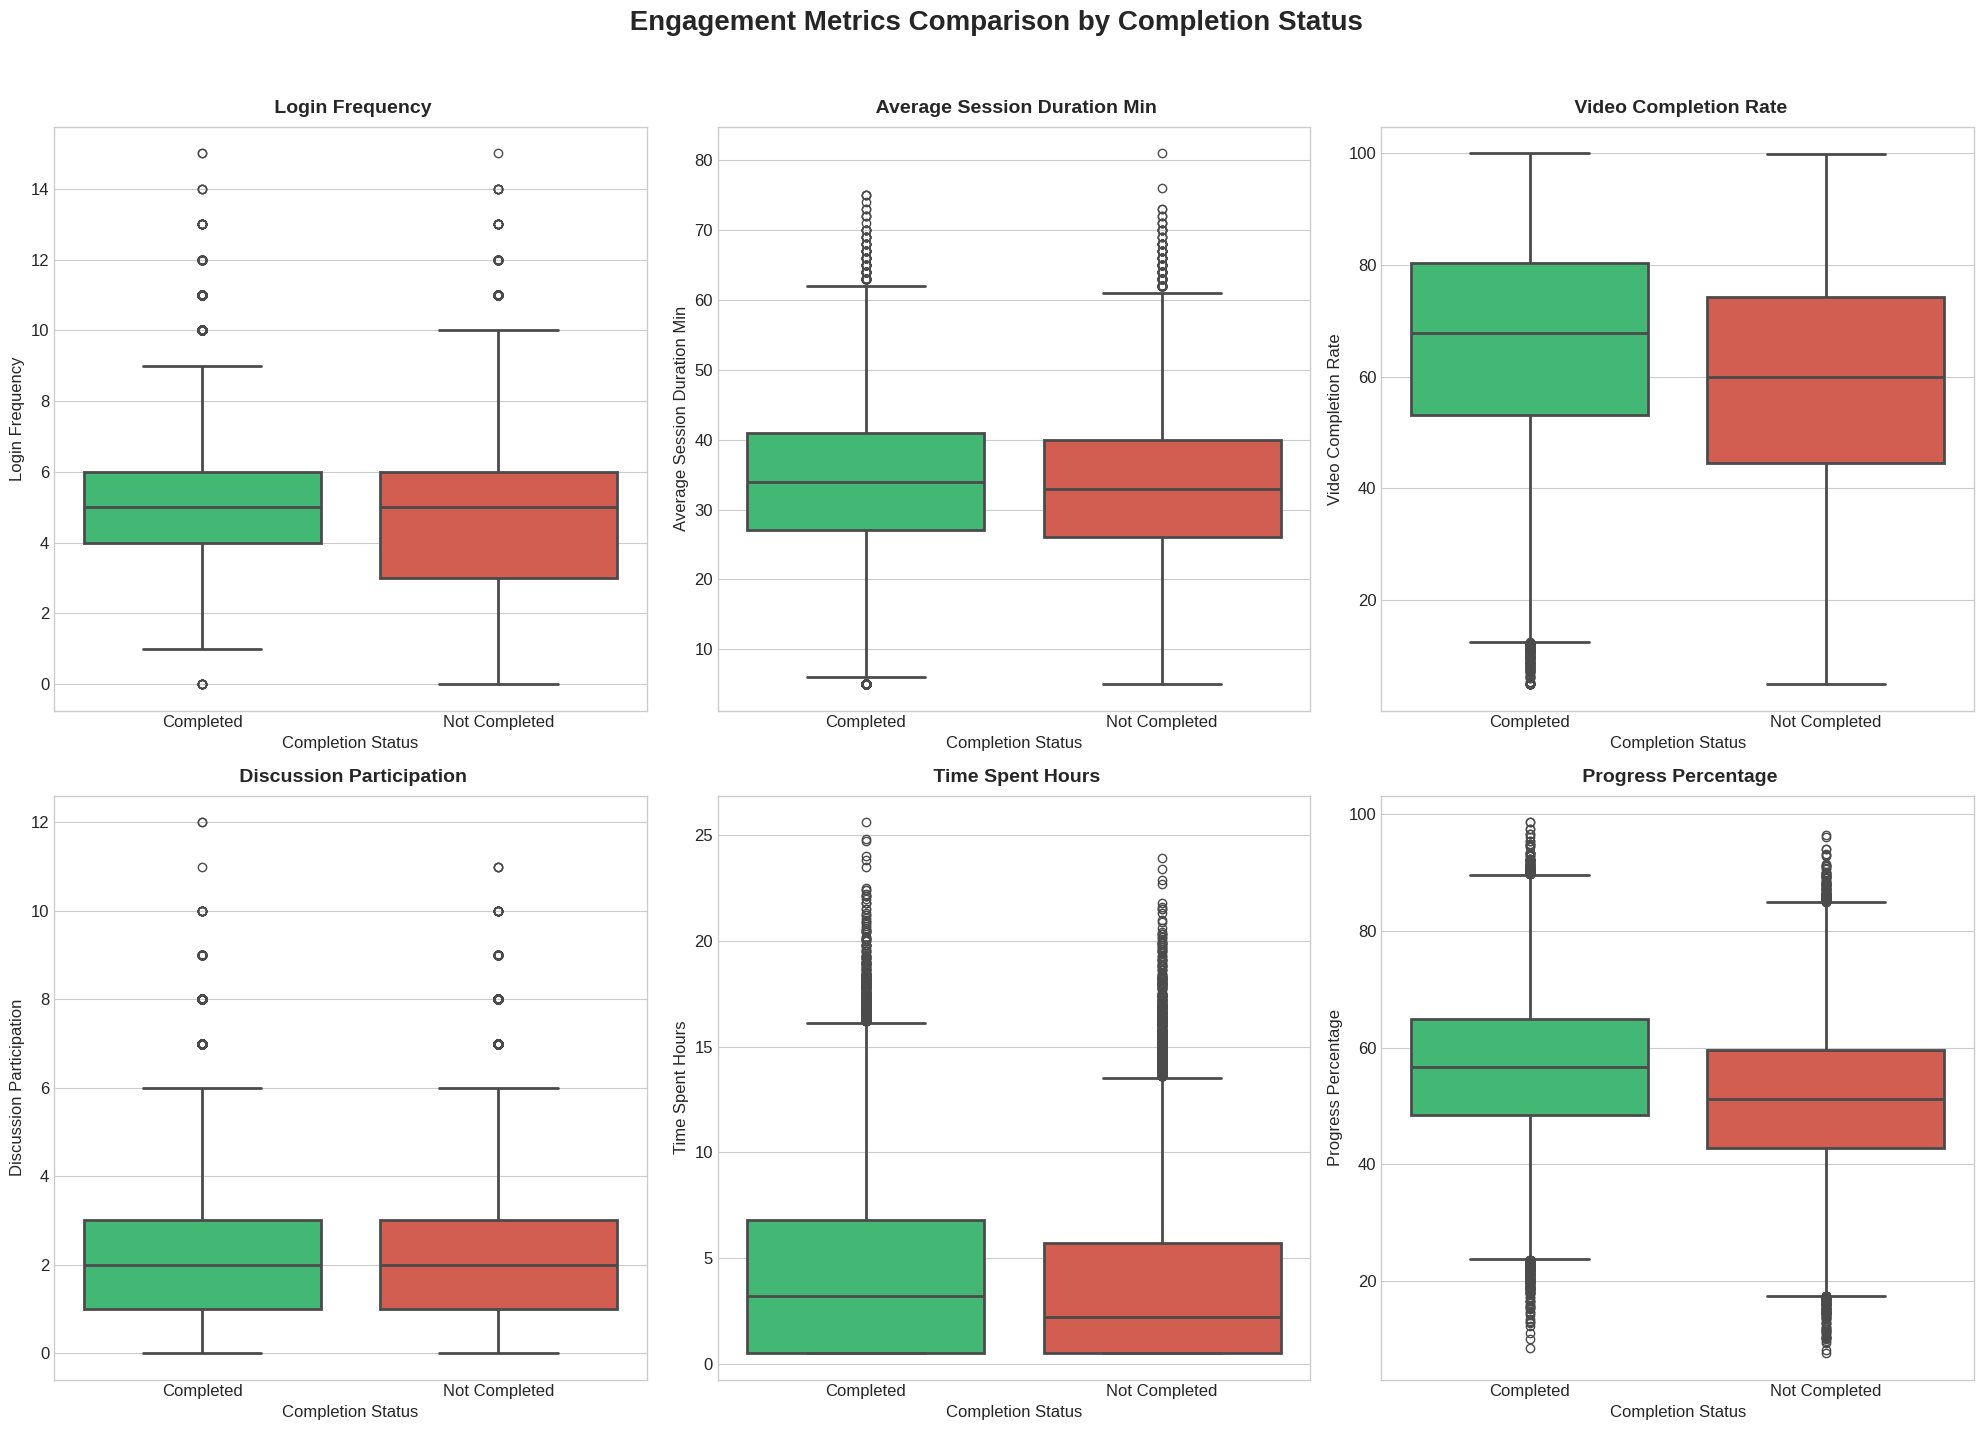

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

for idx, col in enumerate(engagement_cols):
    ax = axes[idx]
    sns.boxplot(data=df, x='Completed', y=col, palette=COMPLETION_COLORS, ax=ax, linewidth=2)
    ax.set_title(f' {col.replace("_", " ")}', fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel('Completion Status', fontsize=12)
    ax.set_ylabel(col.replace("_", " "), fontsize=12)

plt.suptitle(' Engagement Metrics Comparison by Completion Status', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('engagement_boxplots.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Advanced Correlation Analysis

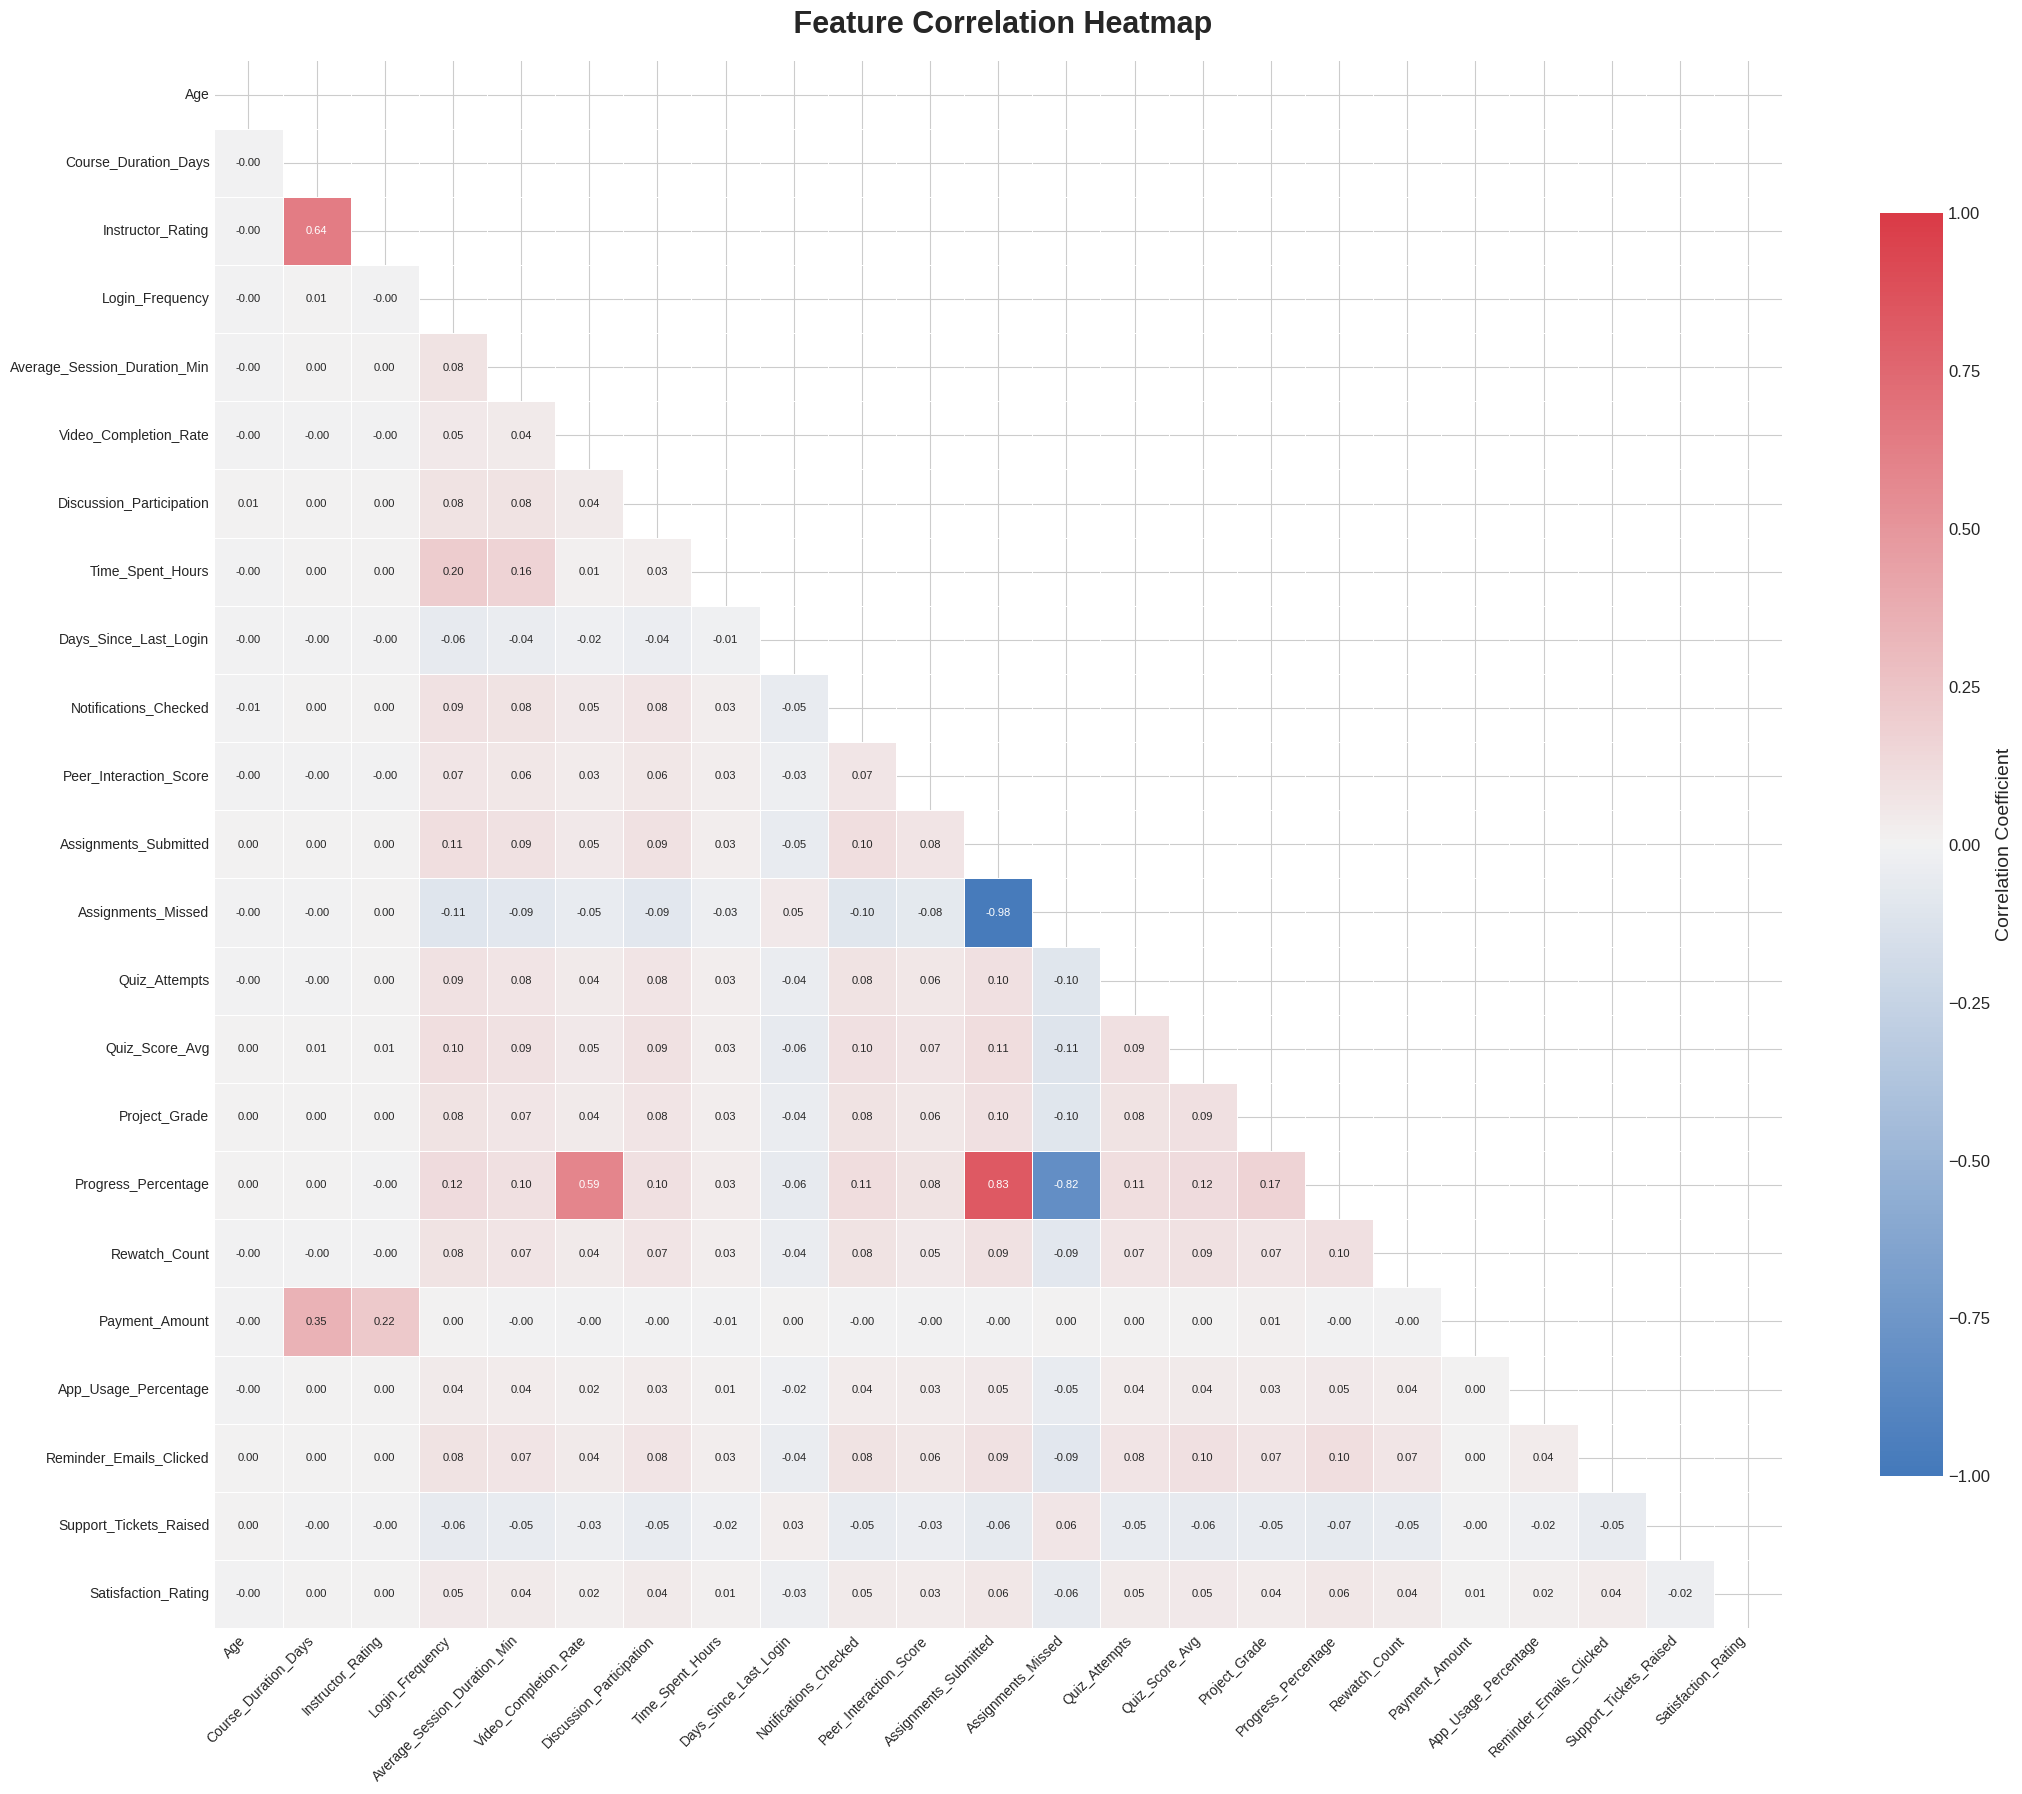


 Top 10 Strongest Correlations (excluding self-correlations):
                        Feature 1            Feature 2  Correlation
187         Assignments_Submitted   Assignments_Missed    -0.984013
191         Assignments_Submitted  Progress_Percentage     0.833256
201            Assignments_Missed  Progress_Percentage    -0.819986
22           Course_Duration_Days    Instructor_Rating     0.638474
110         Video_Completion_Rate  Progress_Percentage     0.591128
38           Course_Duration_Days       Payment_Amount     0.350785
58              Instructor_Rating       Payment_Amount     0.223238
66                Login_Frequency     Time_Spent_Hours     0.204219
225                 Project_Grade  Progress_Percentage     0.165583
84   Average_Session_Duration_Min     Time_Spent_Hours     0.164911


In [22]:
# Select numerical columns for correlation
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['Student_ID']]

# Create correlation matrix
corr_matrix = df[numerical_features].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create figure
fig, ax = plt.subplots(figsize=(22, 18))

# Custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Create heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, annot=True, fmt='.2f', annot_kws={'size': 8},
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title(' Feature Correlation Heatmap', fontsize=22, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n Top 10 Strongest Correlations (excluding self-correlations):")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
corr_pairs_df = pd.DataFrame(corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
print(corr_pairs_df.reindex(corr_pairs_df['Correlation'].abs().sort_values(ascending=False).index).head(10))

## Target Correlation Analysis

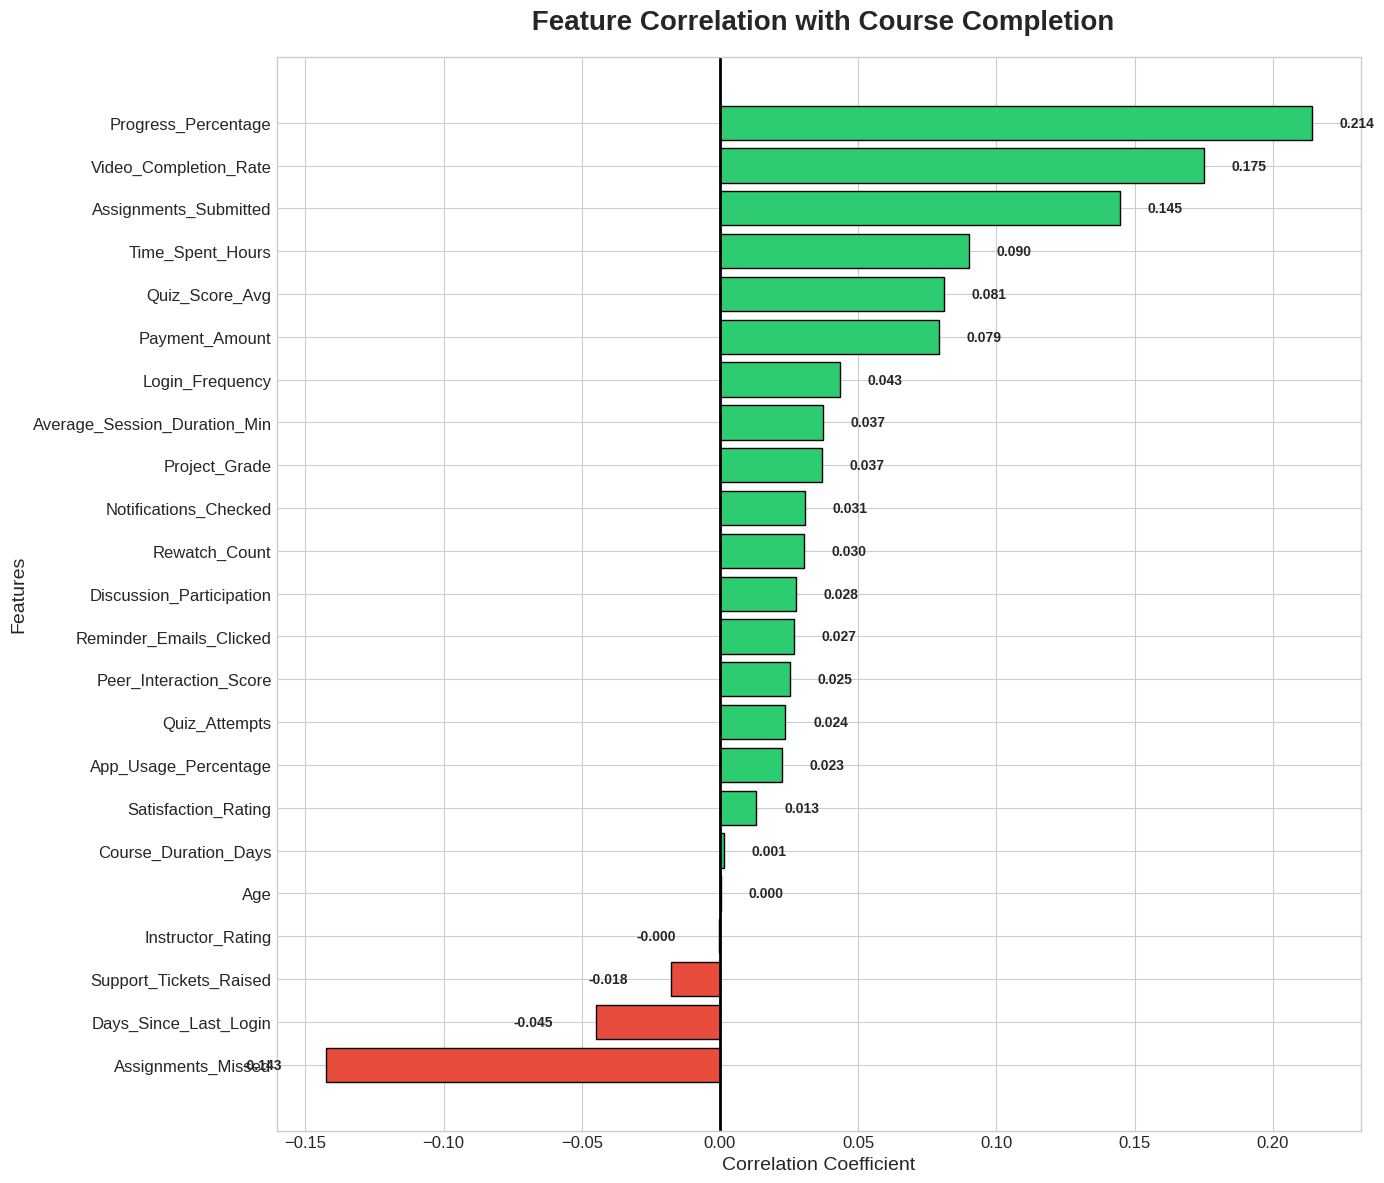


 Top 5 Positive Correlations with Completion:
Quiz_Score_Avg           0.080957
Time_Spent_Hours         0.090079
Assignments_Submitted    0.144848
Video_Completion_Rate    0.175222
Progress_Percentage      0.214026
Name: Completed_Binary, dtype: float64

 Top 5 Negative Correlations with Completion:
Assignments_Missed       -0.142592
Days_Since_Last_Login    -0.044754
Support_Tickets_Raised   -0.017578
Instructor_Rating        -0.000233
Age                       0.000299
Name: Completed_Binary, dtype: float64


In [23]:
# Create binary target
df['Completed_Binary'] = (df['Completed'] == 'Completed').astype(int)

# Calculate correlations with target
target_corr = df[numerical_features + ['Completed_Binary']].corr()['Completed_Binary'].drop('Completed_Binary')
target_corr = target_corr.sort_values(ascending=True)

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(14, 12))

colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in target_corr.values]
bars = ax.barh(target_corr.index, target_corr.values, color=colors, edgecolor='black', linewidth=1)

ax.axvline(x=0, color='black', linewidth=2)
ax.set_title(' Feature Correlation with Course Completion', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Correlation Coefficient', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# Add value labels
for bar, val in zip(bars, target_corr.values):
    x_pos = val + 0.01 if val >= 0 else val - 0.03
    ax.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('target_correlations.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n Top 5 Positive Correlations with Completion:")
print(target_corr.tail(5))
print("\n Top 5 Negative Correlations with Completion:")
print(target_corr.head(5))

## Advanced Visualization: Pairwise Relationships

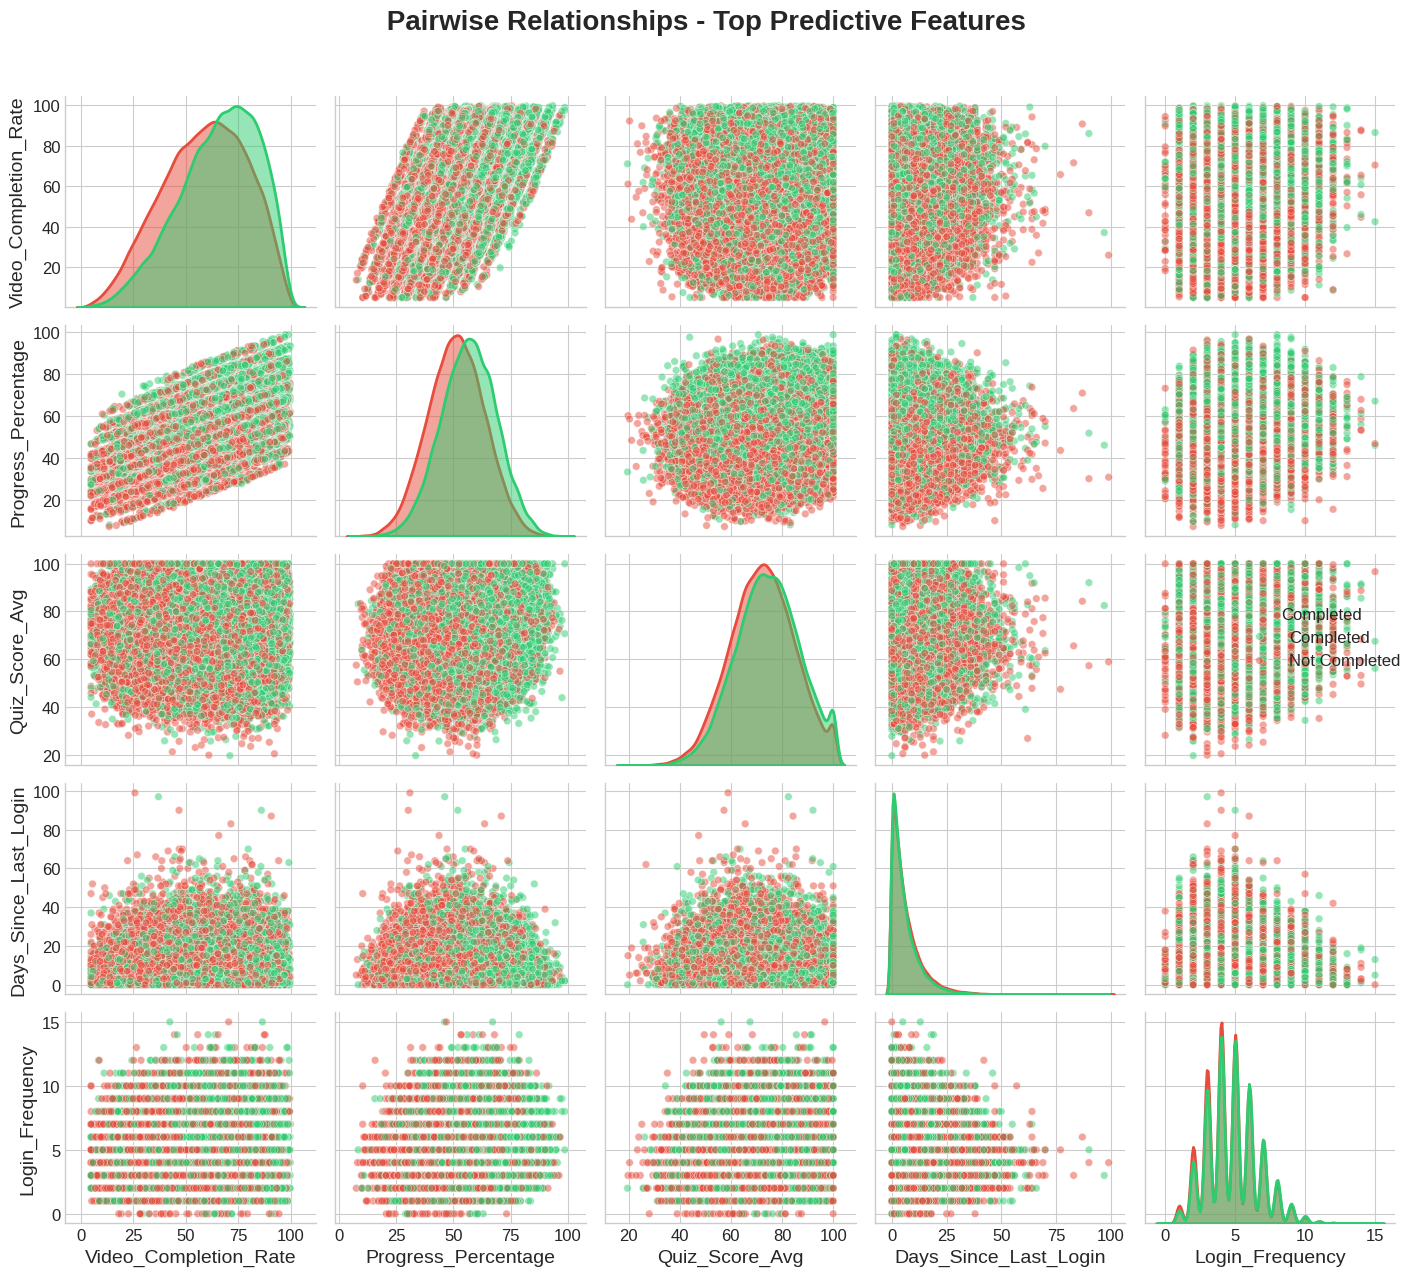

In [24]:
top_features = ['Video_Completion_Rate', 'Progress_Percentage', 'Quiz_Score_Avg',
                'Days_Since_Last_Login', 'Login_Frequency']

# Create pairplot
g = sns.pairplot(df[top_features + ['Completed']], hue='Completed',
                  palette=COMPLETION_COLORS, diag_kind='kde',
                  plot_kws={'alpha': 0.5, 's': 30, 'edgecolor': 'white', 'linewidth': 0.5},
                  diag_kws={'linewidth': 2, 'fill': True, 'alpha': 0.5})

g.figure.suptitle(' Pairwise Relationships - Top Predictive Features', fontsize=20, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('pairplot_top_features.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


## Advanced Visualization: Violin Plots

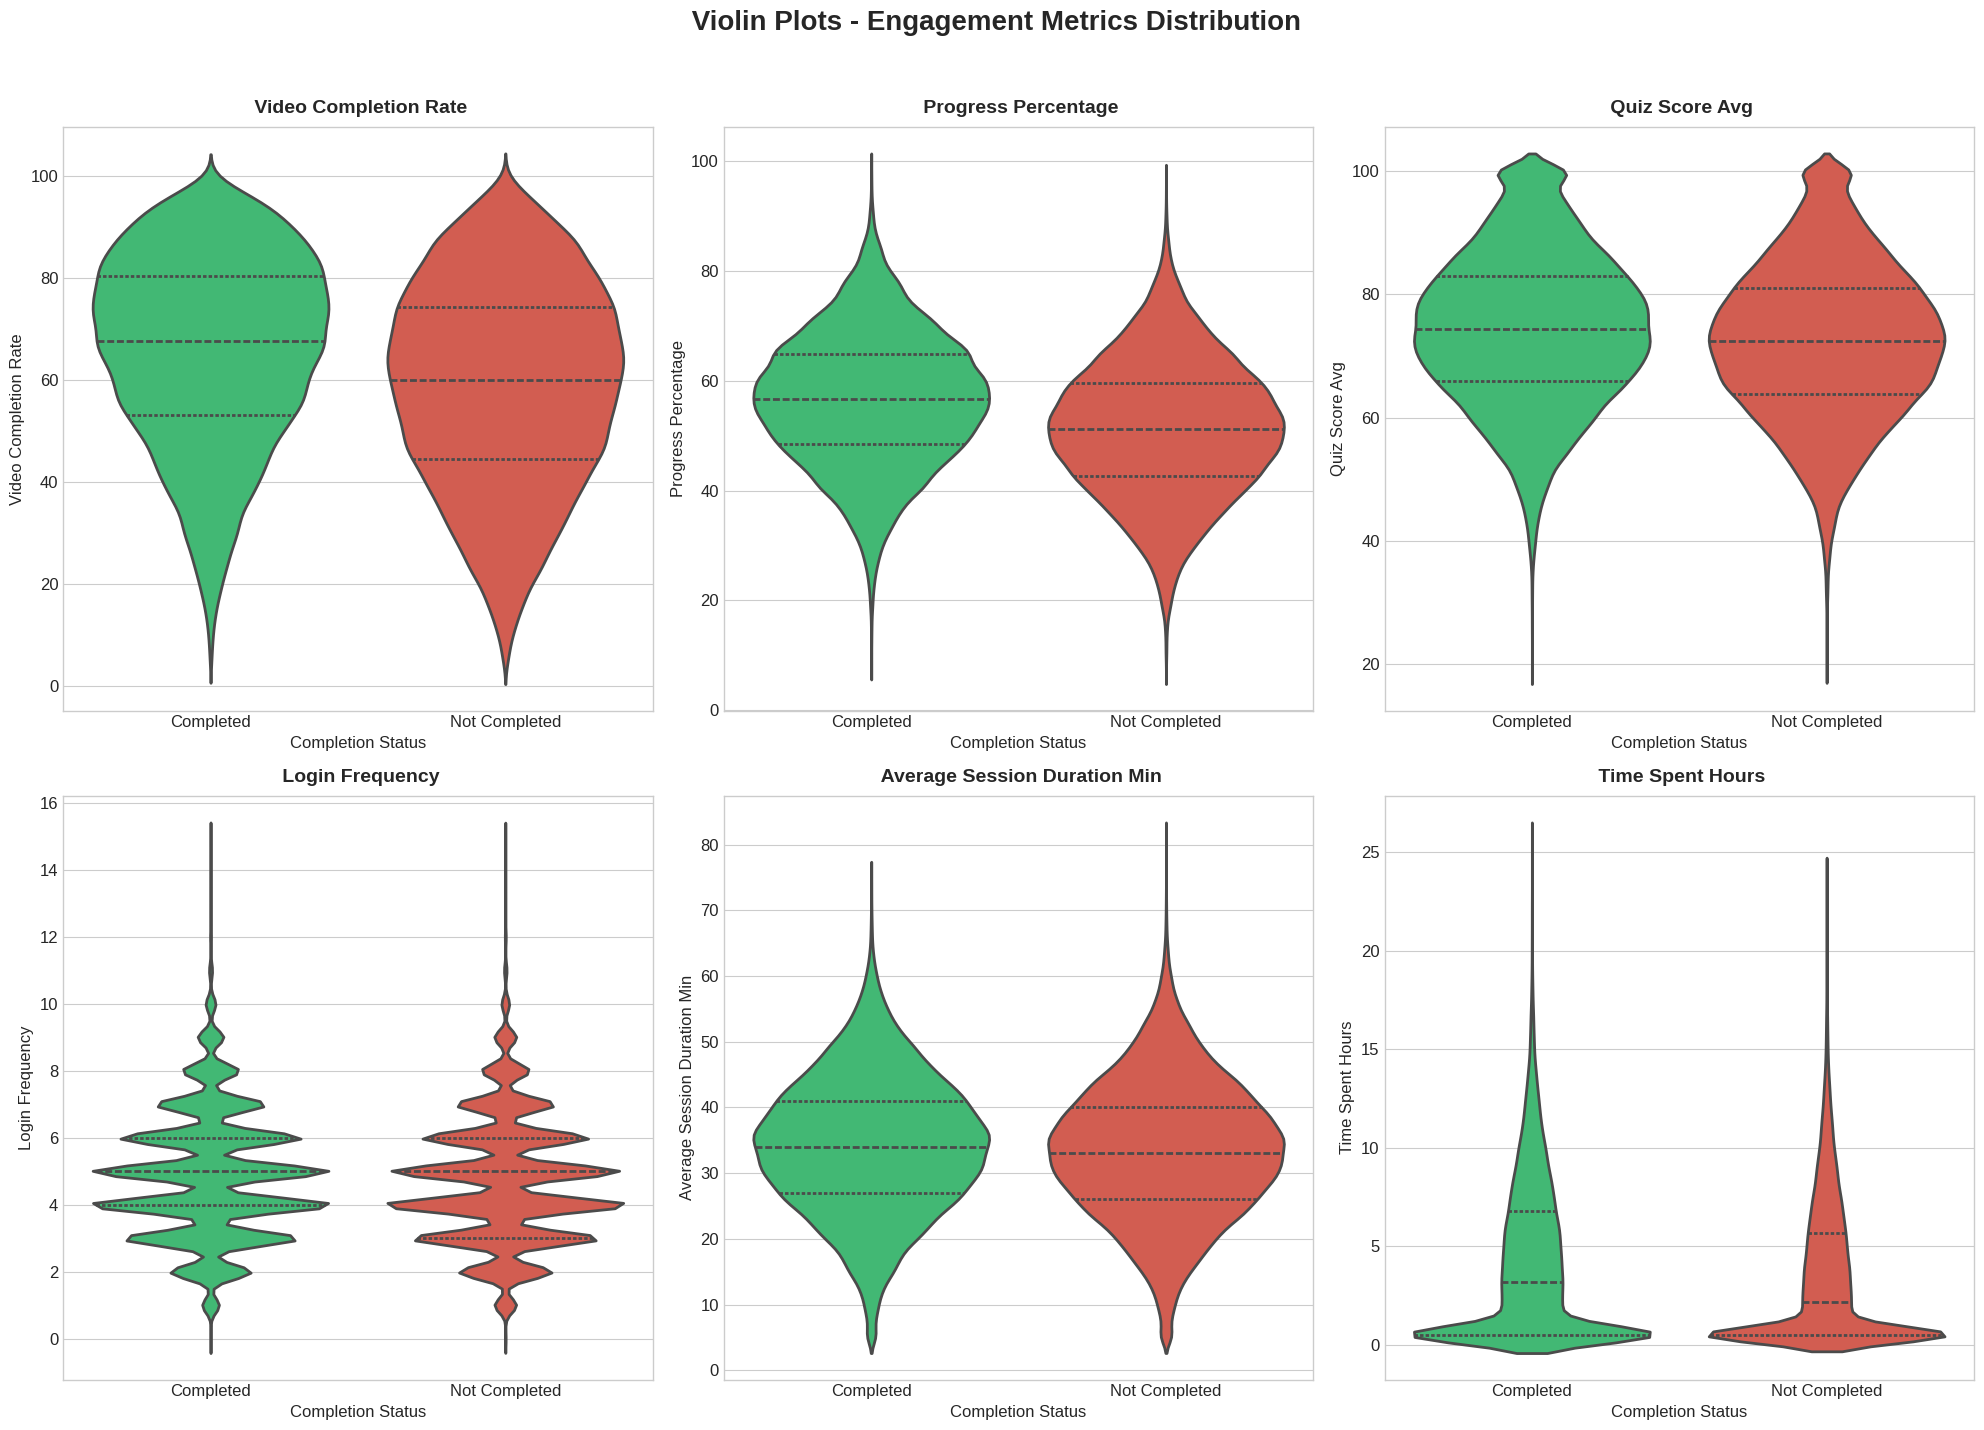

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

metrics = ['Video_Completion_Rate', 'Progress_Percentage', 'Quiz_Score_Avg',
           'Login_Frequency', 'Average_Session_Duration_Min', 'Time_Spent_Hours']

for idx, col in enumerate(metrics):
    ax = axes[idx]
    sns.violinplot(data=df, x='Completed', y=col, palette=COMPLETION_COLORS, ax=ax,
                   inner='quartile', linewidth=2)
    ax.set_title(f' {col.replace("_", " ")}', fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel('Completion Status', fontsize=12)
    ax.set_ylabel(col.replace("_", " "), fontsize=12)

plt.suptitle(' Violin Plots - Engagement Metrics Distribution', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('violin_plots.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Advanced Visualization: KDE Joint Plots

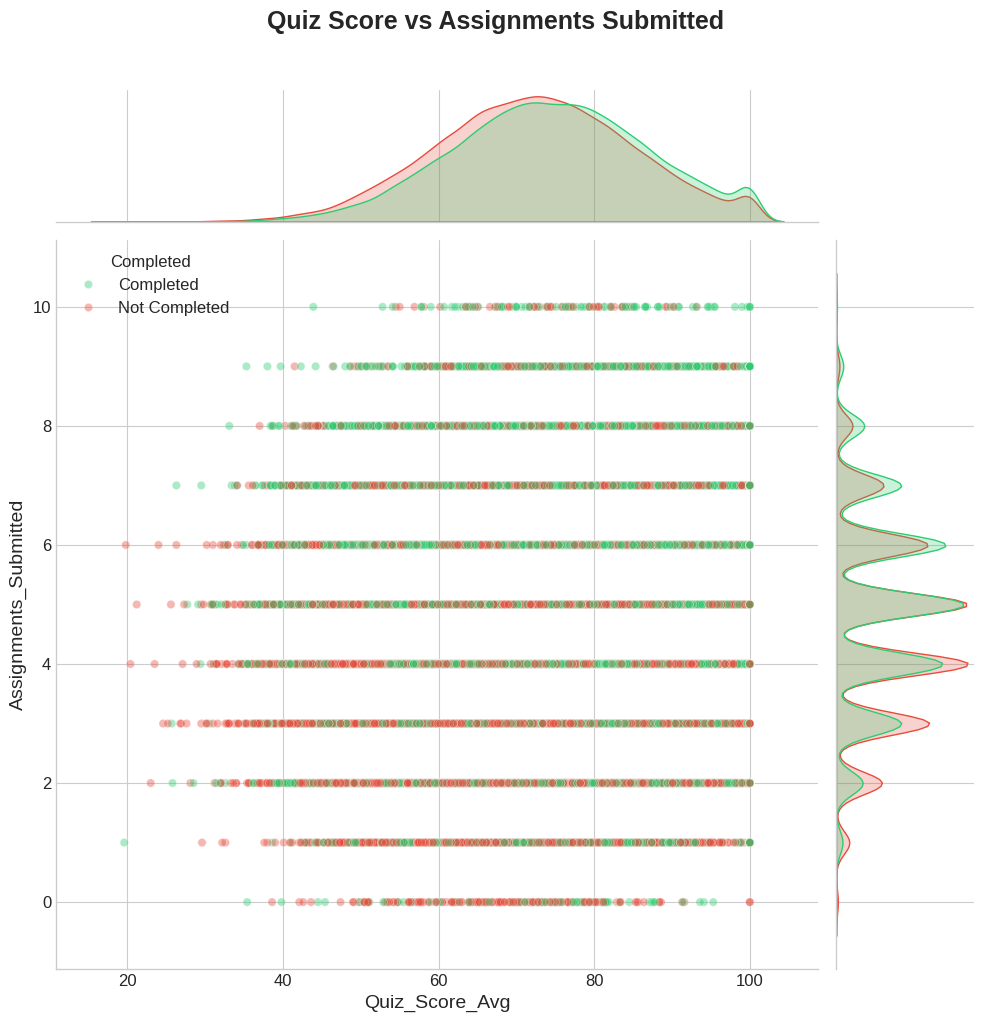

In [26]:
g = sns.jointplot(data=df, x='Quiz_Score_Avg', y='Assignments_Submitted',
                  hue='Completed', palette=COMPLETION_COLORS, kind='scatter',
                  alpha=0.4, height=10)

g.figure.suptitle(' Quiz Score vs Assignments Submitted', fontsize=18, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('kde_joint_quiz_assignments.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Payment & Financial Analysis

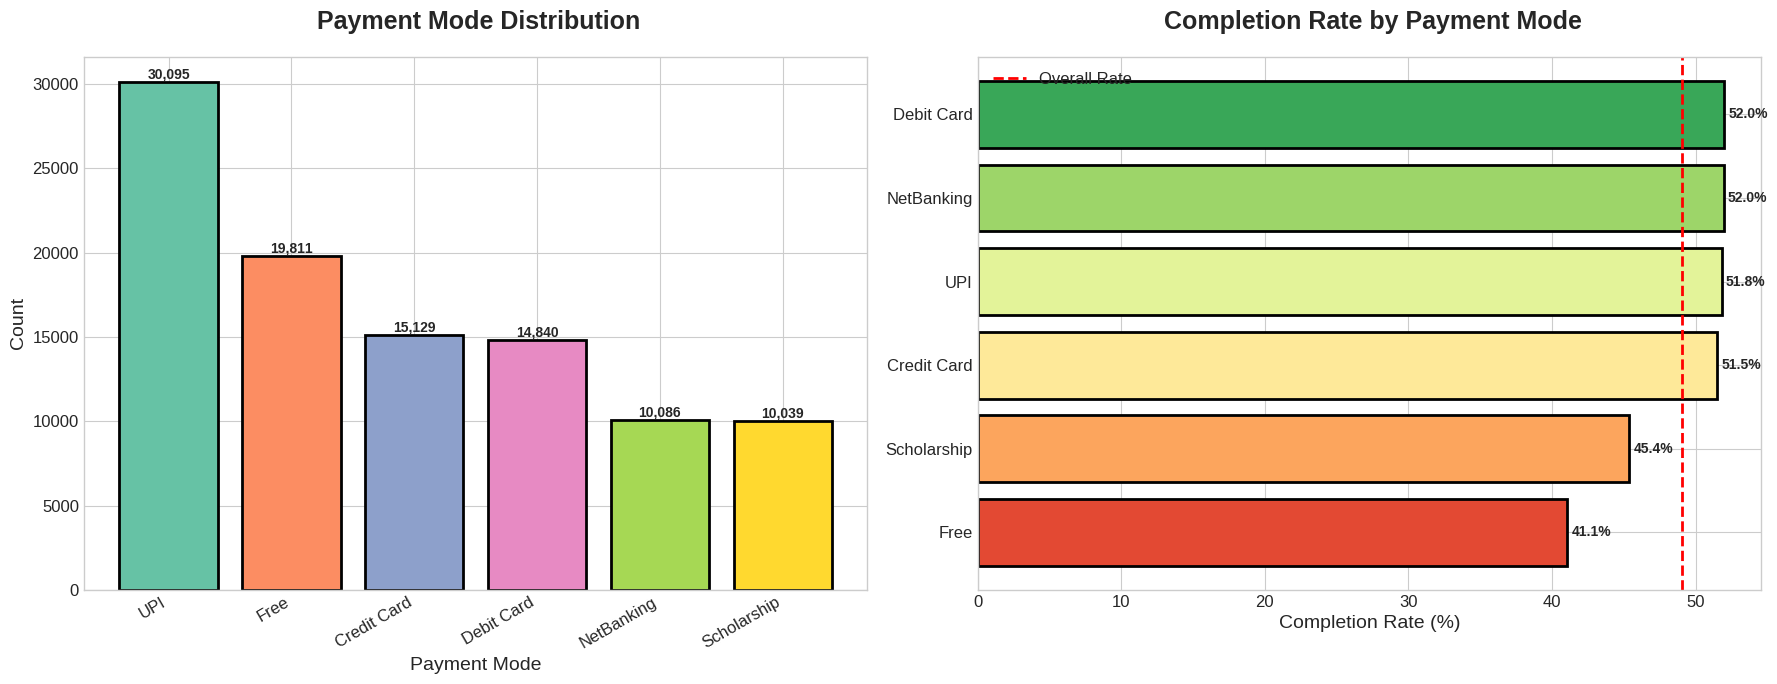

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Payment Mode Distribution
ax1 = axes[0]
payment_counts = df['Payment_Mode'].value_counts()
colors = sns.color_palette("Set2", len(payment_counts))
bars = ax1.bar(payment_counts.index, payment_counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title(' Payment Mode Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Payment Mode', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

for bar, val in zip(bars, payment_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}', ha='center', fontsize=10, fontweight='bold')

# Payment Mode vs Completion
ax2 = axes[1]
payment_completion = df.groupby('Payment_Mode')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
).sort_values(ascending=True)
colors = sns.color_palette("RdYlGn", len(payment_completion))
bars = ax2.barh(payment_completion.index, payment_completion.values, color=colors, edgecolor='black', linewidth=2)
ax2.set_title(' Completion Rate by Payment Mode', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Completion Rate (%)', fontsize=14)
ax2.axvline(x=(df['Completed']=='Completed').mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Rate')
ax2.legend(fontsize=12)

for bar, val in zip(bars, payment_completion.values):
    ax2.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('payment_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Payment Amount Analysis:

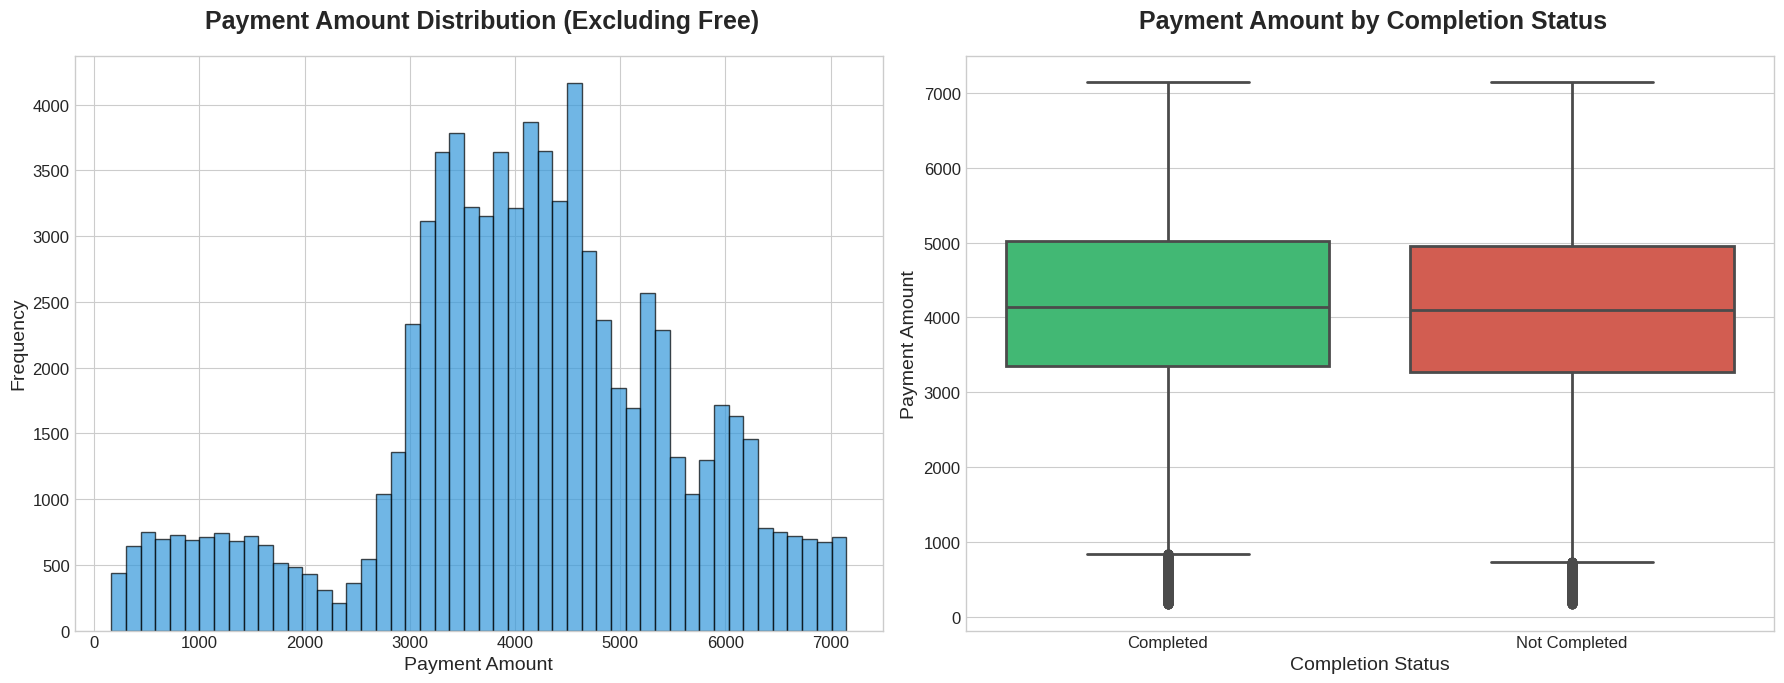


 Free vs Paid Course Completion Analysis:
Free Courses Completion Rate: 41.07%
Paid Courses Completion Rate: 51.00%


In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Payment Amount Distribution
ax1 = axes[0]
ax1.hist(df[df['Payment_Amount'] > 0]['Payment_Amount'], bins=50, color='#3498db',
         edgecolor='black', alpha=0.7)
ax1.set_title(' Payment Amount Distribution (Excluding Free)', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Payment Amount', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)

# Payment Amount by Completion
ax2 = axes[1]
sns.boxplot(data=df[df['Payment_Amount'] > 0], x='Completed', y='Payment_Amount',
            palette=COMPLETION_COLORS, ax=ax2, linewidth=2)
ax2.set_title(' Payment Amount by Completion Status', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Completion Status', fontsize=14)
ax2.set_ylabel('Payment Amount', fontsize=14)

plt.tight_layout()
plt.savefig('payment_amount_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Free vs Paid Analysis
print("\n Free vs Paid Course Completion Analysis:")
df['Is_Free'] = df['Payment_Amount'] == 0
free_analysis = df.groupby('Is_Free')['Completed'].apply(lambda x: (x=='Completed').mean()*100)
print(f"Free Courses Completion Rate: {free_analysis[True]:.2f}%")
print(f"Paid Courses Completion Rate: {free_analysis[False]:.2f}%")

## Geographic Analysis

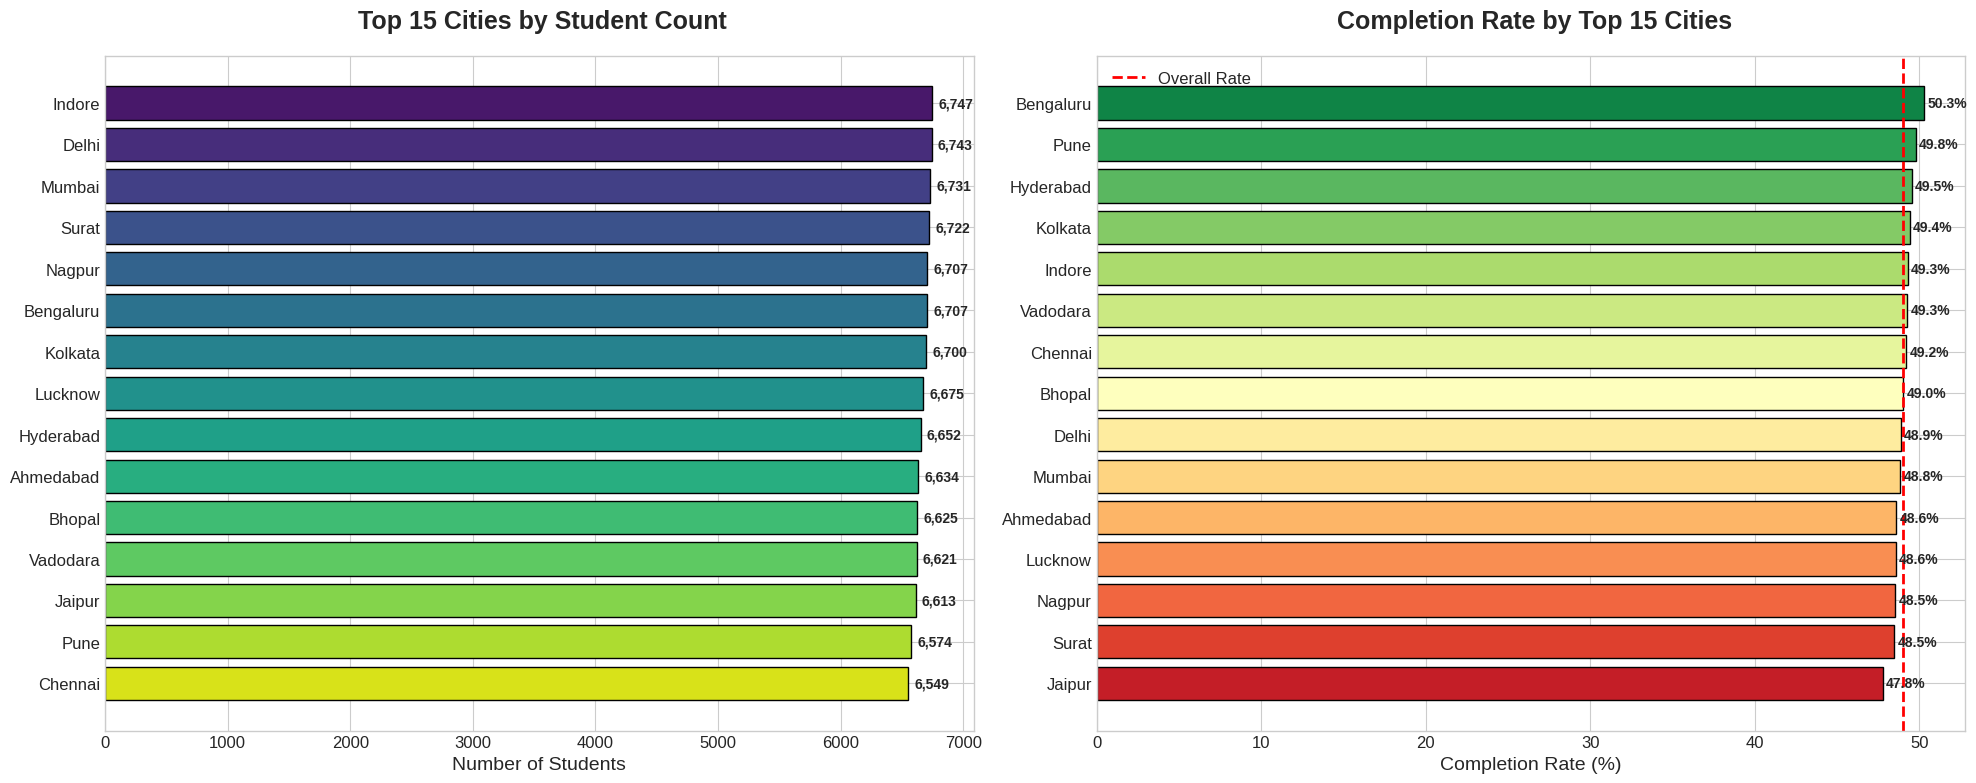

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top Cities by Student Count
ax1 = axes[0]
city_counts = df['City'].value_counts().head(15)
colors = sns.color_palette("viridis", len(city_counts))
bars = ax1.barh(city_counts.index, city_counts.values, color=colors, edgecolor='black', linewidth=1)
ax1.set_title(' Top 15 Cities by Student Count', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Number of Students', fontsize=14)
ax1.invert_yaxis()

for bar, val in zip(bars, city_counts.values):
    ax1.text(val + 50, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=10, fontweight='bold')

# Completion Rate by Top Cities
ax2 = axes[1]
top_cities = df['City'].value_counts().head(15).index.tolist()
city_completion = df[df['City'].isin(top_cities)].groupby('City')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
).sort_values(ascending=True)
colors = sns.color_palette("RdYlGn", len(city_completion))
bars = ax2.barh(city_completion.index, city_completion.values, color=colors, edgecolor='black', linewidth=1)
ax2.set_title(' Completion Rate by Top 15 Cities', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Completion Rate (%)', fontsize=14)
ax2.axvline(x=(df['Completed']=='Completed').mean()*100, color='red', linestyle='--', linewidth=2, label='Overall Rate')
ax2.legend(fontsize=12)

for bar, val in zip(bars, city_completion.values):
    ax2.text(val + 0.2, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('city_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Assignment & Quiz Performance Analysis

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Assignments Submitted Distribution
ax1 = axes[0, 0]
sns.histplot(data=df, x='Assignments_Submitted', hue='Completed', multiple='stack',
             palette=COMPLETION_COLORS, ax=ax1, bins=15, edgecolor='black')
ax1.set_title(' Assignments Submitted Distribution', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('Assignments Submitted', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

# Assignments Missed Distribution
ax2 = axes[0, 1]
sns.histplot(data=df, x='Assignments_Missed', hue='Completed', multiple='stack',
             palette=COMPLETION_COLORS, ax=ax2, bins=15, edgecolor='black')
ax2.set_title(' Assignments Missed Distribution', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Assignments Missed', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)

# Quiz Attempts Distribution
ax3 = axes[1, 0]
sns.boxplot(data=df, x='Completed', y='Quiz_Attempts', palette=COMPLETION_COLORS, ax=ax3, linewidth=2)
ax3.set_title(' Quiz Attempts by Completion', fontsize=16, fontweight='bold', pad=15)
ax3.set_xlabel('Completion Status', fontsize=14)
ax3.set_ylabel('Quiz Attempts', fontsize=14)

# Quiz Score Average Distribution
ax4 = axes[1, 1]
sns.violinplot(data=df, x='Completed', y='Quiz_Score_Avg', palette=COMPLETION_COLORS, ax=ax4,
               inner='quartile', linewidth=2)
ax4.set_title(' Quiz Score Average by Completion', fontsize=16, fontweight='bold', pad=15)
ax4.set_xlabel('Completion Status', fontsize=14)
ax4.set_ylabel('Quiz Score Average', fontsize=14)

plt.suptitle(' Assignment & Quiz Performance Analysis', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('assignment_quiz_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Interactive Plotly Visualizations

In [30]:
sunburst_data = df.groupby(['Category', 'Course_Level', 'Completed']).size().reset_index(name='Count')

fig = px.sunburst(sunburst_data,
                  path=['Category', 'Course_Level', 'Completed'],
                  values='Count',
                  color='Count',
                  color_continuous_scale='RdYlGn',
                  title=' Course Hierarchy: Category → Level → Completion')

fig.update_layout(
    title_font_size=22,
    title_font_family='Arial Black',
    width=900,
    height=700
)

fig.show()

In [31]:
treemap_data = df.groupby(['Category', 'Course_Name', 'Completed']).size().reset_index(name='Count')

fig = px.treemap(treemap_data,
                 path=['Category', 'Course_Name', 'Completed'],
                 values='Count',
                 color='Count',
                 color_continuous_scale='Viridis',
                 title=' Course Distribution Treemap')

fig.update_layout(
    title_font_size=22,
    title_font_family='Arial Black',
    width=1000,
    height=700
)

fig.show()

In [32]:
sample_df = df.sample(n=5000, random_state=42)

fig = px.scatter_3d(sample_df,
                    x='Video_Completion_Rate',
                    y='Progress_Percentage',
                    z='Quiz_Score_Avg',
                    color='Completed',
                    color_discrete_map=COMPLETION_COLORS,
                    opacity=0.7,
                    title=' 3D Feature Space: Video Completion × Progress × Quiz Score')

fig.update_layout(
    title_font_size=20,
    width=1000,
    height=700,
    scene=dict(
        xaxis_title='Video Completion Rate',
        yaxis_title='Progress Percentage',
        zaxis_title='Quiz Score Average'
    )
)

fig.show()

## Radar Chart Analysis

In [33]:
# Calculate mean values for each group
metrics_for_radar = ['Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate',
                     'Discussion_Participation', 'Quiz_Score_Avg', 'Progress_Percentage']

completed_means = df[df['Completed']=='Completed'][metrics_for_radar].mean()
not_completed_means = df[df['Completed']=='Not Completed'][metrics_for_radar].mean()

# Normalize to 0-100 scale
max_vals = df[metrics_for_radar].max()
completed_norm = (completed_means / max_vals * 100).values
not_completed_norm = (not_completed_means / max_vals * 100).values

# Create radar chart
categories = [m.replace('_', ' ') for m in metrics_for_radar]
categories = categories + [categories[0]]  # Close the radar

completed_norm = np.append(completed_norm, completed_norm[0])
not_completed_norm = np.append(not_completed_norm, not_completed_norm[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=completed_norm,
    theta=categories,
    fill='toself',
    name='Completed',
    line_color='#2ecc71',
    fillcolor='rgba(46, 204, 113, 0.3)'
))

fig.add_trace(go.Scatterpolar(
    r=not_completed_norm,
    theta=categories,
    fill='toself',
    name='Not Completed',
    line_color='#e74c3c',
    fillcolor='rgba(231, 76, 60, 0.3)'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    showlegend=True,
    title=' Student Engagement Profile: Completed vs Not Completed',
    title_font_size=20,
    width=800,
    height=600
)

fig.show()

## Funnel Analysis

In [34]:
# Define engagement stages
df['Stage_Enrolled'] = 1
df['Stage_Active'] = (df['Login_Frequency'] >= 2).astype(int)
df['Stage_Engaged'] = ((df['Video_Completion_Rate'] >= 50) & (df['Login_Frequency'] >= 2)).astype(int)
df['Stage_Quiz_Active'] = ((df['Quiz_Attempts'] >= 2) & (df['Video_Completion_Rate'] >= 50)).astype(int)
df['Stage_Assignment_Active'] = ((df['Assignments_Submitted'] >= 3) & (df['Quiz_Attempts'] >= 2)).astype(int)
df['Stage_Completed'] = (df['Completed'] == 'Completed').astype(int)

# Calculate counts
funnel_data = {
    'Enrolled': df['Stage_Enrolled'].sum(),
    'Active (Login ≥2)': df['Stage_Active'].sum(),
    'Engaged (Video ≥50%)': df['Stage_Engaged'].sum(),
    'Quiz Active (≥2 attempts)': df['Stage_Quiz_Active'].sum(),
    'Assignment Active (≥3 submitted)': df['Stage_Assignment_Active'].sum(),
    'Completed': df['Stage_Completed'].sum()
}

fig = go.Figure(go.Funnel(
    y=list(funnel_data.keys()),
    x=list(funnel_data.values()),
    textposition="inside",
    textinfo="value+percent initial",
    opacity=0.85,
    marker=dict(
        color=['#3498db', '#9b59b6', '#1abc9c', '#f39c12', '#e74c3c', '#2ecc71'],
        line=dict(width=2, color='white')
    ),
    connector=dict(line=dict(color="gray", dash="dot", width=2))
))

fig.update_layout(
    title=' Student Engagement to Completion Funnel',
    title_font_size=22,
    width=900,
    height=600
)

fig.show()

# Print conversion rates
print("\n Stage-wise Conversion Rates:")
prev_val = list(funnel_data.values())[0]
for stage, val in funnel_data.items():
    conv_rate = val / prev_val * 100 if prev_val > 0 else 0
    overall_rate = val / list(funnel_data.values())[0] * 100
    print(f"{stage}: {val:,} ({conv_rate:.1f}% from prev | {overall_rate:.1f}% overall)")
    prev_val = val


 Stage-wise Conversion Rates:
Enrolled: 100,000 (100.0% from prev | 100.0% overall)
Active (Login ≥2): 98,251 (98.3% from prev | 98.3% overall)
Engaged (Video ≥50%): 71,791 (73.1% from prev | 71.8% overall)
Quiz Active (≥2 attempts): 64,587 (90.0% from prev | 64.6% overall)
Assignment Active (≥3 submitted): 80,882 (125.2% from prev | 80.9% overall)
Completed: 49,030 (60.6% from prev | 49.0% overall)


## App Usage Polar Chart

In [35]:
# DEMOGRAPHIC PYRAMID - AGE BY GENDER

# Bin app usage into categories
df['App_Usage_Bin'] = pd.cut(df['App_Usage_Percentage'],
                              bins=[0, 20, 40, 60, 80, 100],
                              labels=['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])

app_usage_completion = df.groupby('App_Usage_Bin').agg({
    'Completed': lambda x: (x == 'Completed').mean() * 100,
    'Student_ID': 'count'
}).reset_index()
app_usage_completion.columns = ['App Usage', 'Completion Rate', 'Count']

fig = go.Figure()

fig.add_trace(go.Barpolar(
    r=app_usage_completion['Completion Rate'],
    theta=app_usage_completion['App Usage'],
    width=[0.8]*5,
    marker_color=['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8,
    name='Completion Rate'
))

fig.update_layout(
    title='📱 App Usage vs Completion Rate (Polar Chart)',
    title_font_size=20,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    showlegend=True,
    width=700,
    height=600
)

fig.show()

## Demographic Pyramid

In [ ]:
# Create age bins
df['Age_Bin'] = pd.cut(df['Age'], bins=[15, 20, 25, 30, 35, 40, 45],
                        labels=['16-20', '21-25', '26-30', '31-35', '36-40', '41-45'])

# Calculate counts by age and gender
age_gender = df.groupby(['Age_Bin', 'Gender']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 8))

y_pos = np.arange(len(age_gender.index))
bar_height = 0.35

# Male bars (negative for left side)
if 'Male' in age_gender.columns:
    ax.barh(y_pos, -age_gender['Male'], height=bar_height, label='Male',
            color='#3498db', edgecolor='black', linewidth=1.5)

# Female bars (positive for right side)
if 'Female' in age_gender.columns:
    ax.barh(y_pos, age_gender['Female'], height=bar_height, label='Female',
            color='#e91e63', edgecolor='black', linewidth=1.5)

ax.set_yticks(y_pos)
ax.set_yticklabels(age_gender.index, fontsize=12)
ax.set_xlabel('Number of Students', fontsize=14)
ax.set_ylabel('Age Group', fontsize=14)
ax.set_title('🧑‍🤝‍🧑 Age-Gender Population Pyramid', fontsize=20, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linewidth=2)
ax.legend(fontsize=12, loc='upper right')

# Make x-axis symmetric
max_val = max(abs(ax.get_xlim()[0]), ax.get_xlim()[1])
ax.set_xlim(-max_val, max_val)

# Add count labels
for idx, row in enumerate(age_gender.index):
    if 'Male' in age_gender.columns:
        ax.text(-age_gender.loc[row, 'Male']-500, idx, f'{age_gender.loc[row, "Male"]:,}',
                va='center', ha='right', fontsize=10, fontweight='bold')
    if 'Female' in age_gender.columns:
        ax.text(age_gender.loc[row, 'Female']+500, idx, f'{age_gender.loc[row, "Female"]:,}',
                va='center', ha='left', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('demographic_pyramid.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Swarm Plot Analysis

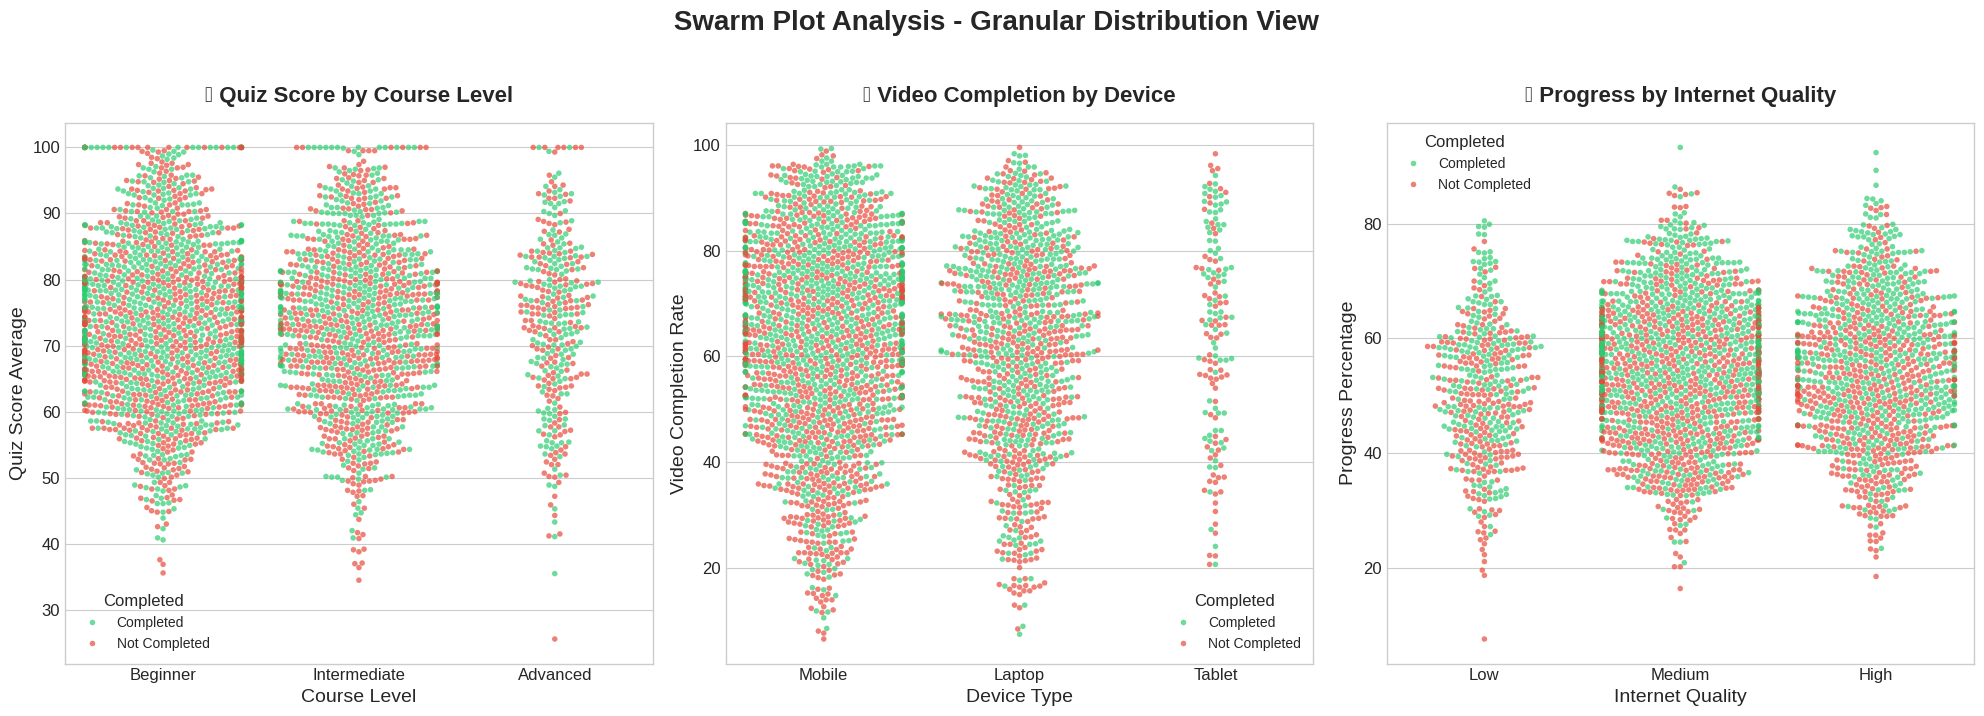

In [36]:
# Sample for performance
sample_df = df.sample(n=3000, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Quiz Score by Course Level
ax1 = axes[0]
sns.swarmplot(data=sample_df, x='Course_Level', y='Quiz_Score_Avg', hue='Completed',
              palette=COMPLETION_COLORS, ax=ax1, size=4, alpha=0.7,
              order=['Beginner', 'Intermediate', 'Advanced'])
ax1.set_title('🐝 Quiz Score by Course Level', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('Course Level', fontsize=14)
ax1.set_ylabel('Quiz Score Average', fontsize=14)
ax1.legend(title='Completed', fontsize=10)

# Video Completion by Device
ax2 = axes[1]
sns.swarmplot(data=sample_df, x='Device_Type', y='Video_Completion_Rate', hue='Completed',
              palette=COMPLETION_COLORS, ax=ax2, size=4, alpha=0.7)
ax2.set_title('🐝 Video Completion by Device', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Device Type', fontsize=14)
ax2.set_ylabel('Video Completion Rate', fontsize=14)
ax2.legend(title='Completed', fontsize=10)

# Progress by Internet Quality
ax3 = axes[2]
sns.swarmplot(data=sample_df, x='Internet_Connection_Quality', y='Progress_Percentage',
              hue='Completed', palette=COMPLETION_COLORS, ax=ax3, size=4, alpha=0.7,
              order=['Low', 'Medium', 'High'])
ax3.set_title('🐝 Progress by Internet Quality', fontsize=16, fontweight='bold', pad=15)
ax3.set_xlabel('Internet Quality', fontsize=14)
ax3.set_ylabel('Progress Percentage', fontsize=14)
ax3.legend(title='Completed', fontsize=10)

plt.suptitle(' Swarm Plot Analysis - Granular Distribution View', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('swarm_plots.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Days Since Last Login Analysis

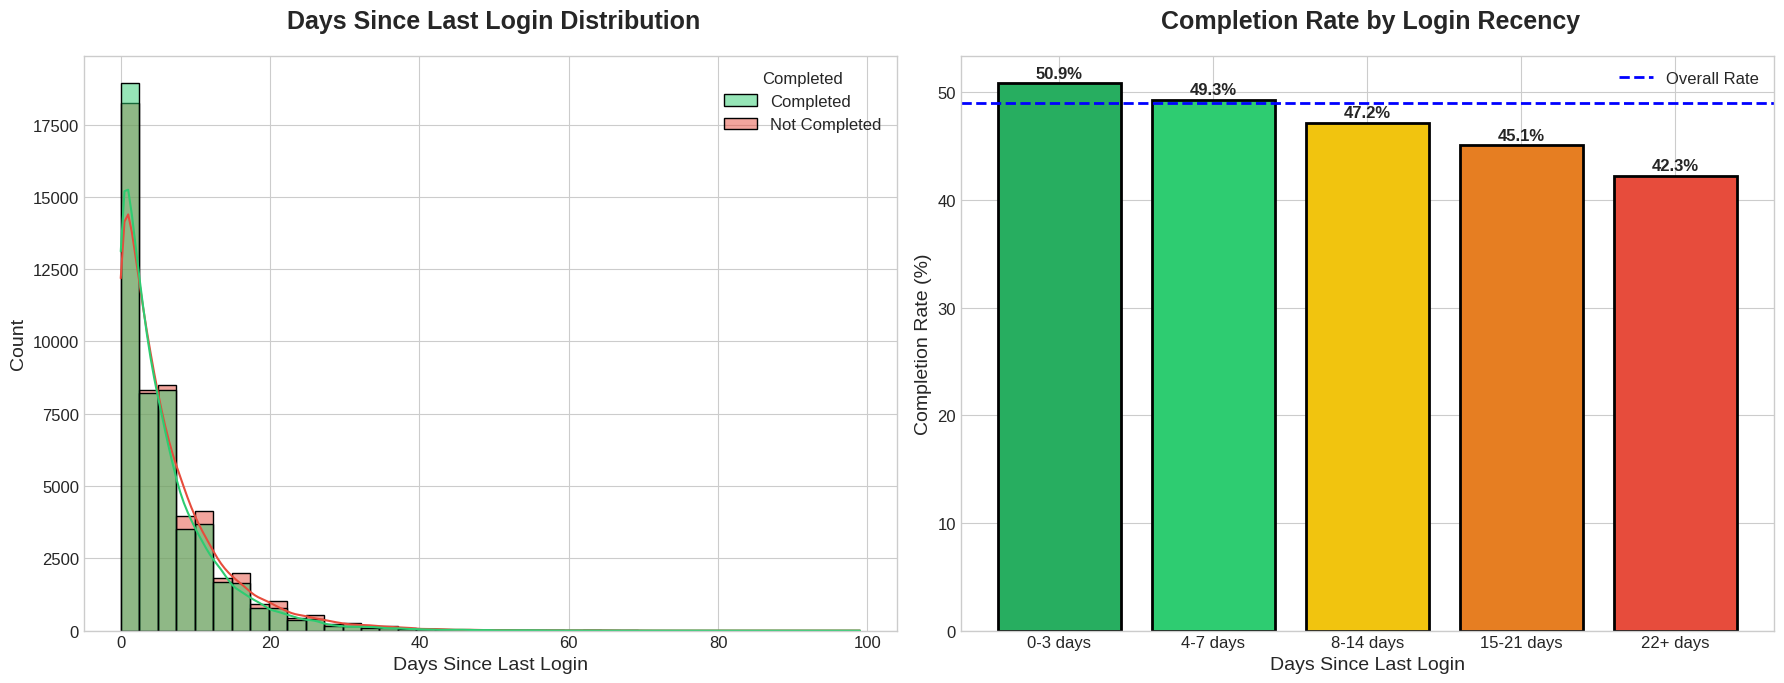


 KEY INSIGHT: Login recency is a strong predictor of completion!
Students who logged in within 3 days: 50.9% completion rate
Students who haven't logged in for 22+ days: 42.3% completion rate


In [37]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Distribution
ax1 = axes[0]
sns.histplot(data=df, x='Days_Since_Last_Login', hue='Completed',
             palette=COMPLETION_COLORS, ax=ax1, bins=40, kde=True)
ax1.set_title(' Days Since Last Login Distribution', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Days Since Last Login', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

# Completion Rate by Days Since Last Login Bins
ax2 = axes[1]
df['Login_Recency_Bin'] = pd.cut(df['Days_Since_Last_Login'],
                                  bins=[0, 3, 7, 14, 21, 35],
                                  labels=['0-3 days', '4-7 days', '8-14 days', '15-21 days', '22+ days'])
login_completion = df.groupby('Login_Recency_Bin')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
)
colors = ['#27ae60', '#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']
bars = ax2.bar(login_completion.index, login_completion.values, color=colors, edgecolor='black', linewidth=2)
ax2.set_title(' Completion Rate by Login Recency', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Days Since Last Login', fontsize=14)
ax2.set_ylabel('Completion Rate (%)', fontsize=14)
ax2.axhline(y=(df['Completed']=='Completed').mean()*100, color='blue', linestyle='--', linewidth=2, label='Overall Rate')
ax2.legend(fontsize=12)

for bar, val in zip(bars, login_completion.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('login_recency_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n KEY INSIGHT: Login recency is a strong predictor of completion!")
print(f"Students who logged in within 3 days: {login_completion.iloc[0]:.1f}% completion rate")
print(f"Students who haven't logged in for 22+ days: {login_completion.iloc[-1]:.1f}% completion rate")

## Statistical Hypothesis Testing

In [38]:
print("="*70)
print(" STATISTICAL HYPOTHESIS TESTING")
print("="*70)

# Prepare groups
completed = df[df['Completed'] == 'Completed']
not_completed = df[df['Completed'] == 'Not Completed']

# 1. Mann-Whitney U Test for numerical features
print("\n" + "="*70)
print(" Mann-Whitney U Test (Non-parametric test for group differences)")
print("="*70)

numerical_tests = ['Video_Completion_Rate', 'Progress_Percentage', 'Quiz_Score_Avg',
                   'Login_Frequency', 'Days_Since_Last_Login', 'Time_Spent_Hours',
                   'Assignments_Submitted', 'Assignments_Missed']

test_results = []
for col in numerical_tests:
    stat, p_value = mannwhitneyu(completed[col], not_completed[col], alternative='two-sided')
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    effect_size = abs(completed[col].mean() - not_completed[col].mean()) / df[col].std()
    test_results.append({
        'Feature': col,
        'U-Statistic': f'{stat:,.0f}',
        'P-Value': f'{p_value:.2e}',
        'Significance': significance,
        'Effect Size (Cohen\'s d)': f'{effect_size:.3f}'
    })

results_df = pd.DataFrame(test_results)
display(results_df)

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

# 2. Chi-Square Tests for categorical features
print("\n" + "="*70)
print(" Chi-Square Test (Association between categorical variables and completion)")
print("="*70)

categorical_tests = ['Gender', 'Education_Level', 'Employment_Status', 'Device_Type',
                     'Internet_Connection_Quality', 'Course_Level', 'Category', 'Payment_Mode']

chi_results = []
for col in categorical_tests:
    contingency = pd.crosstab(df[col], df['Completed'])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    cramers_v = np.sqrt(chi2 / (len(df) * (min(contingency.shape) - 1)))
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    chi_results.append({
        'Feature': col,
        'Chi-Square': f'{chi2:.2f}',
        'P-Value': f'{p_value:.2e}',
        'Degrees of Freedom': dof,
        'Cramér\'s V': f'{cramers_v:.3f}',
        'Significance': significance
    })

chi_results_df = pd.DataFrame(chi_results)
display(chi_results_df)

 STATISTICAL HYPOTHESIS TESTING

 Mann-Whitney U Test (Non-parametric test for group differences)


Feature    U-Statistic    P-Value Significance  \
0  Video_Completion_Rate  1,499,309,322   0.00e+00          ***   
1    Progress_Percentage  1,554,076,097   0.00e+00          ***   
2         Quiz_Score_Avg  1,363,878,511  1.45e-138          ***   
3        Login_Frequency  1,310,781,840   3.38e-42          ***   
4  Days_Since_Last_Login  1,191,658,244   3.95e-37          ***   
5       Time_Spent_Hours  1,372,823,492  3.16e-167          ***   
6  Assignments_Submitted  1,452,525,376   0.00e+00          ***   
7     Assignments_Missed  1,049,646,740   0.00e+00          ***   

  Effect Size (Cohen's d)  
0                   0.351  
1                   0.428  
2                   0.162  
3                   0.087  
4                   0.090  
5                   0.180  
6                   0.290  
7                   0.285


Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant

 Chi-Square Test (Association between categorical variables and completion)


Feature Chi-Square    P-Value  Degrees of Freedom  \
0                       Gender       6.74   3.44e-02                   2   
1              Education_Level      12.77   1.25e-02                   4   
2            Employment_Status      45.28   8.06e-10                   3   
3                  Device_Type      10.45   5.37e-03                   2   
4  Internet_Connection_Quality      73.47   1.11e-16                   2   
5                 Course_Level       0.16   9.25e-01                   2   
6                     Category       0.88   9.28e-01                   4   
7                 Payment_Mode     772.30  1.14e-164                   5   

  Cramér's V Significance  
0      0.008            *  
1      0.011            *  
2      0.021          ***  
3      0.010           **  
4      0.027          ***  
5      0.001           ns  
6      0.003           ns  
7      0.088          ***

## Feature Importance Analysis

 Training Random Forest Classifier...


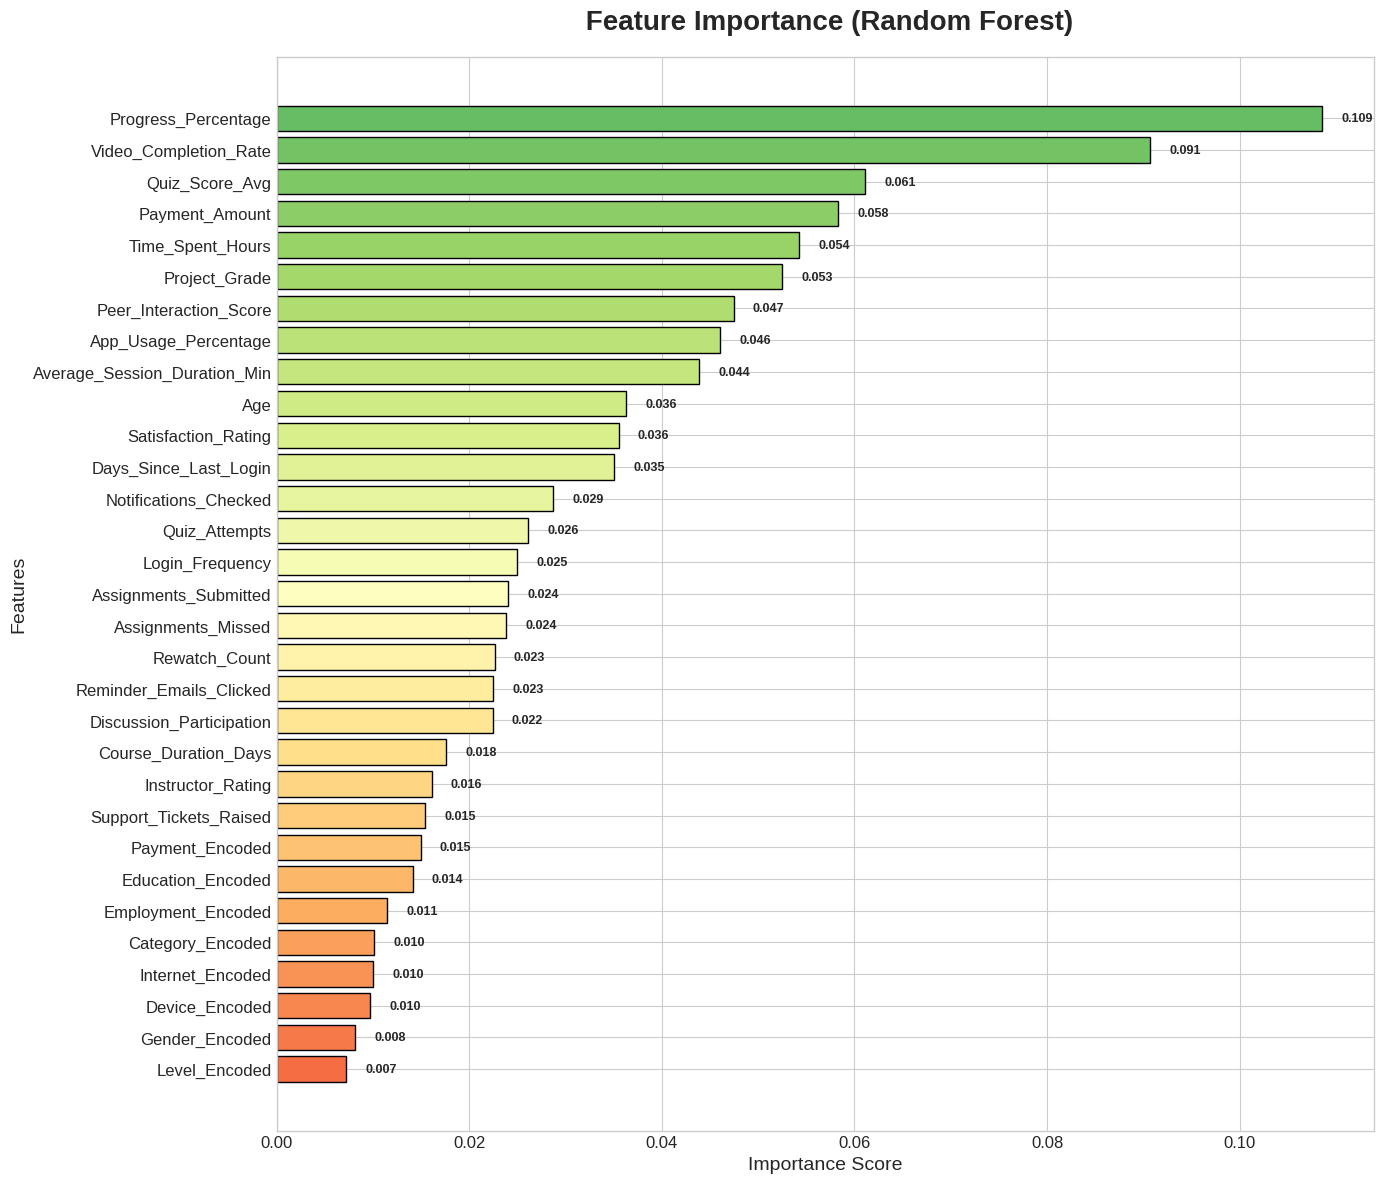


 Top 10 Most Important Features:


Feature  Importance
14           Progress_Percentage    0.108525
3          Video_Completion_Rate    0.090731
12                Quiz_Score_Avg    0.061084
16                Payment_Amount    0.058275
5               Time_Spent_Hours    0.054254
13                 Project_Grade    0.052511
8         Peer_Interaction_Score    0.047465
17          App_Usage_Percentage    0.046054
2   Average_Session_Duration_Min    0.043903
0                            Age    0.036319

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare features
feature_cols = ['Age', 'Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate',
                'Discussion_Participation', 'Time_Spent_Hours', 'Days_Since_Last_Login',
                'Notifications_Checked', 'Peer_Interaction_Score', 'Assignments_Submitted',
                'Assignments_Missed', 'Quiz_Attempts', 'Quiz_Score_Avg', 'Project_Grade',
                'Progress_Percentage', 'Rewatch_Count', 'Payment_Amount', 'App_Usage_Percentage',
                'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Satisfaction_Rating',
                'Course_Duration_Days', 'Instructor_Rating']

# Encode categorical features
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['Gender_Encoded'] = le.fit_transform(df['Gender'])
df_encoded['Education_Encoded'] = le.fit_transform(df['Education_Level'])
df_encoded['Employment_Encoded'] = le.fit_transform(df['Employment_Status'])
df_encoded['Device_Encoded'] = le.fit_transform(df['Device_Type'])
df_encoded['Internet_Encoded'] = le.fit_transform(df['Internet_Connection_Quality'])
df_encoded['Level_Encoded'] = le.fit_transform(df['Course_Level'])
df_encoded['Category_Encoded'] = le.fit_transform(df['Category'])
df_encoded['Payment_Encoded'] = le.fit_transform(df['Payment_Mode'])

# Add encoded features
all_features = feature_cols + ['Gender_Encoded', 'Education_Encoded', 'Employment_Encoded',
                                'Device_Encoded', 'Internet_Encoded', 'Level_Encoded',
                                'Category_Encoded', 'Payment_Encoded']

X = df_encoded[all_features]
y = (df_encoded['Completed'] == 'Completed').astype(int)

# Train Random Forest
print(" Training Random Forest Classifier...")
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importances
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(14, 12))

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(importance_df)))
bars = ax.barh(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=1)

ax.set_title(' Feature Importance (Random Forest)', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Importance Score', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# Add value labels
for bar, val in zip(bars, importance_df['Importance']):
    ax.text(val + 0.002, bar.get_y() + bar.get_height()/2, f'{val:.3f}',
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n Top 10 Most Important Features:")
display(importance_df.tail(10).iloc[::-1])

## XGBoost Feature Importance

 Training XGBoost Classifier...


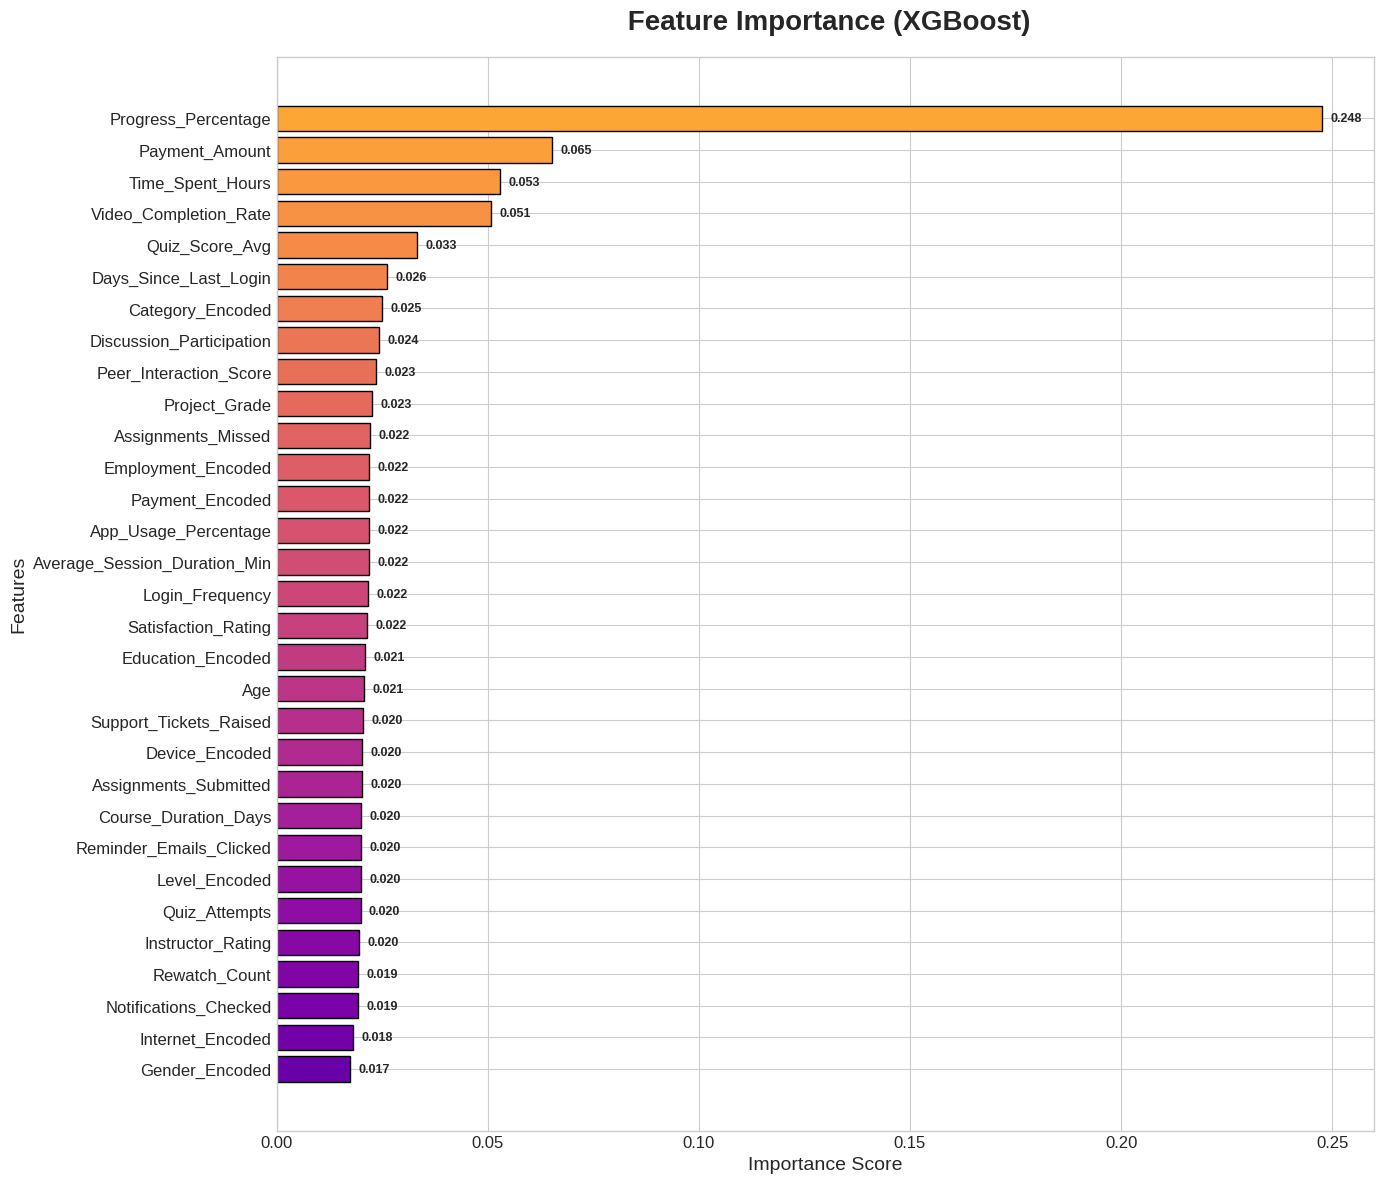


 Top 10 Most Important Features (XGBoost):


Feature  Importance
14       Progress_Percentage    0.247508
16            Payment_Amount    0.065160
5           Time_Spent_Hours    0.052916
3      Video_Completion_Rate    0.050701
12            Quiz_Score_Avg    0.033277
6      Days_Since_Last_Login    0.026226
29          Category_Encoded    0.025034
4   Discussion_Participation    0.024172
8     Peer_Interaction_Score    0.023454
13             Project_Grade    0.022533

In [40]:
try:
    from xgboost import XGBClassifier

    print(" Training XGBoost Classifier...")
    xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1,
                        random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X, y)

    # Get feature importances
    xgb_importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': xgb.feature_importances_
    }).sort_values('Importance', ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(14, 12))

    colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(xgb_importance_df)))
    bars = ax.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color=colors, edgecolor='black', linewidth=1)

    ax.set_title(' Feature Importance (XGBoost)', fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel('Importance Score', fontsize=14)
    ax.set_ylabel('Features', fontsize=14)

    for bar, val in zip(bars, xgb_importance_df['Importance']):
        ax.text(val + 0.002, bar.get_y() + bar.get_height()/2, f'{val:.3f}',
                va='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.savefig('feature_importance_xgb.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print("\n Top 10 Most Important Features (XGBoost):")
    display(xgb_importance_df.tail(10).iloc[::-1])

except ImportError:
    print(" XGBoost not installed. Install with: pip install xgboost")

## Combined Feature Importance Comparison

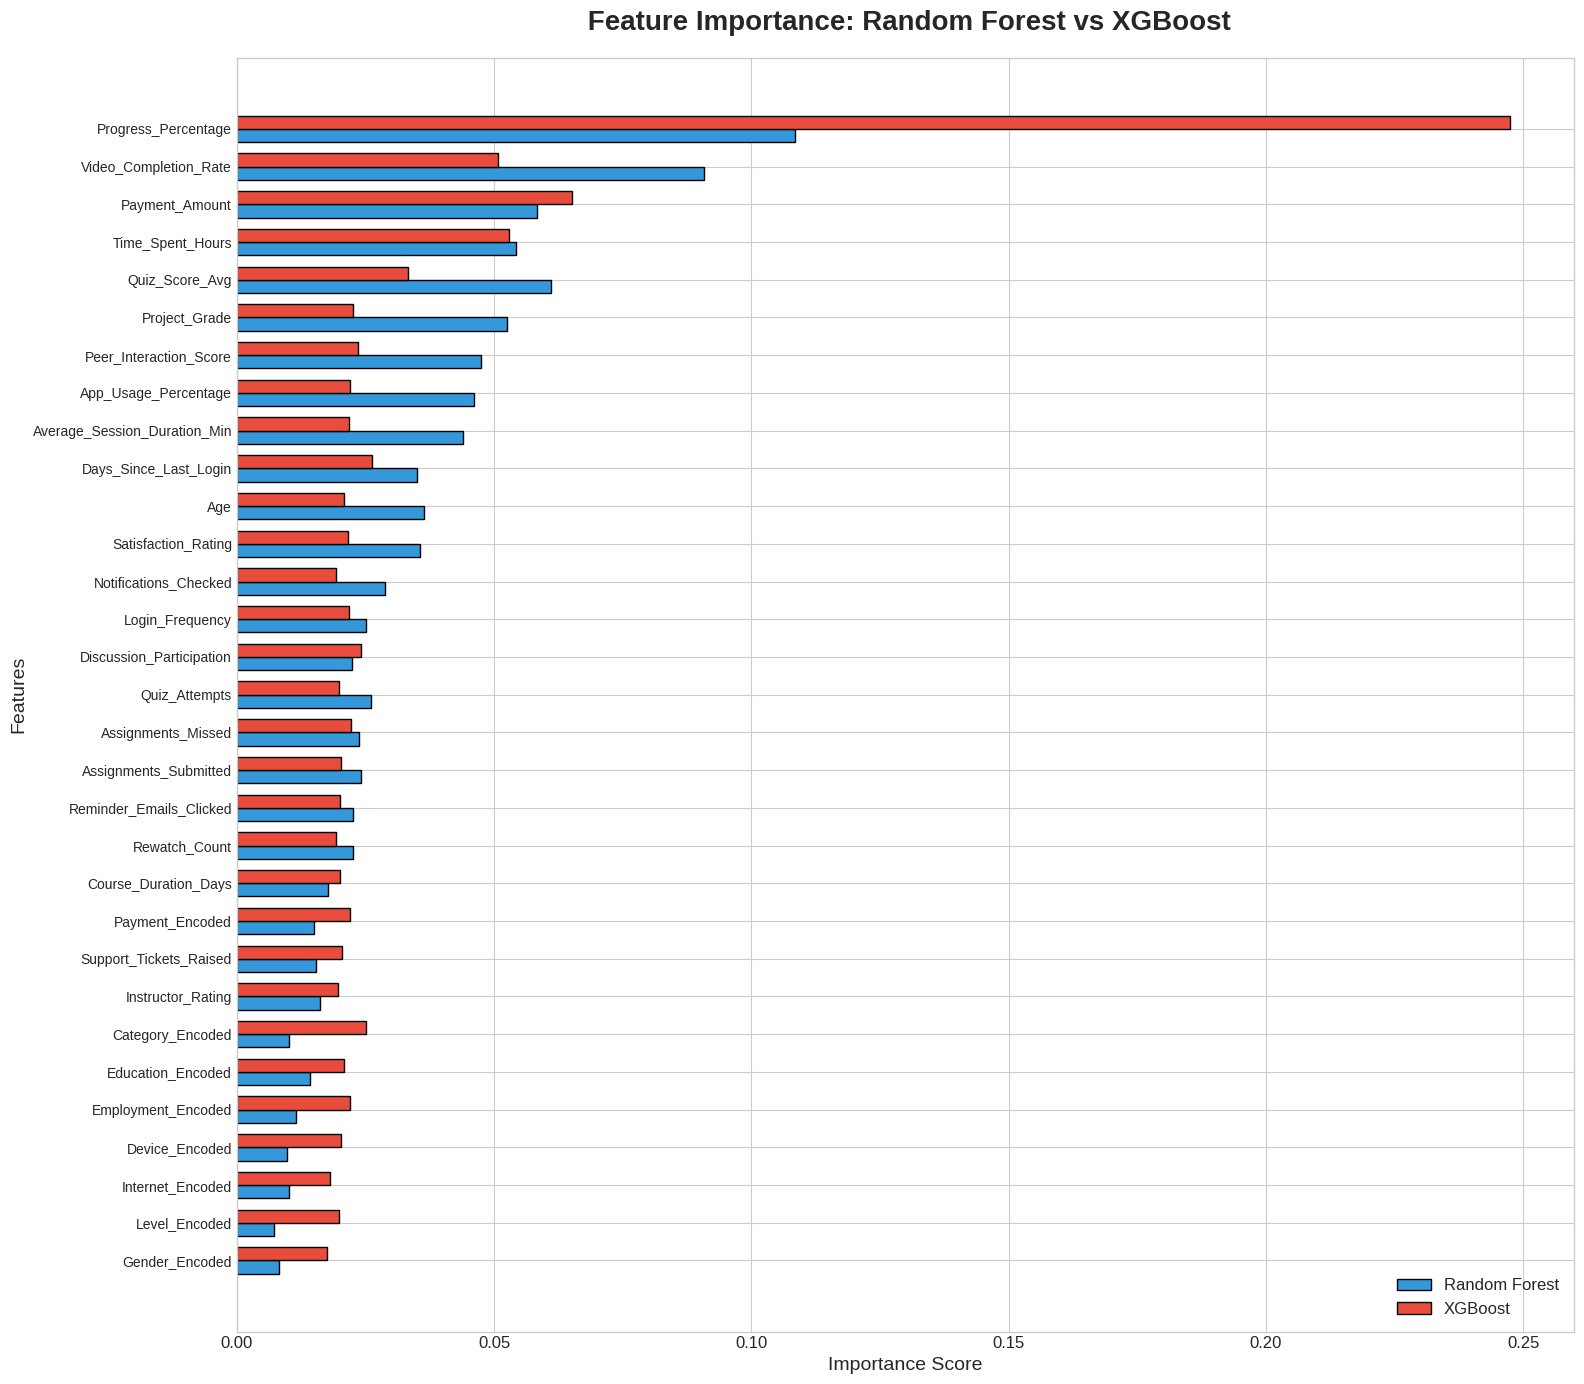


 Top 10 Features by Average Importance:


Feature  RF_Importance  XGB_Importance  \
30           Progress_Percentage       0.108525        0.247508   
29         Video_Completion_Rate       0.090731        0.050701   
27                Payment_Amount       0.058275        0.065160   
26              Time_Spent_Hours       0.054254        0.052916   
28                Quiz_Score_Avg       0.061084        0.033277   
25                 Project_Grade       0.052511        0.022533   
24        Peer_Interaction_Score       0.047465        0.023454   
23          App_Usage_Percentage       0.046054        0.021910   
22  Average_Session_Duration_Min       0.043903        0.021852   
19         Days_Since_Last_Login       0.035080        0.026226   

    Avg_Importance  
30        0.178017  
29        0.070716  
27        0.061718  
26        0.053585  
28        0.047180  
25        0.037522  
24        0.035459  
23        0.033982  
22        0.032877  
19        0.030653

In [41]:
try:
    # Merge importances
    combined_importance = importance_df.rename(columns={'Importance': 'RF_Importance'}).merge(
        xgb_importance_df.rename(columns={'Importance': 'XGB_Importance'}),
        on='Feature'
    )

    combined_importance['Avg_Importance'] = (combined_importance['RF_Importance'] +
                                              combined_importance['XGB_Importance']) / 2
    combined_importance = combined_importance.sort_values('Avg_Importance', ascending=True)

    # Plot comparison
    fig, ax = plt.subplots(figsize=(16, 14))

    y_pos = np.arange(len(combined_importance))
    bar_height = 0.35

    bars1 = ax.barh(y_pos - bar_height/2, combined_importance['RF_Importance'],
                    height=bar_height, label='Random Forest', color='#3498db', edgecolor='black')
    bars2 = ax.barh(y_pos + bar_height/2, combined_importance['XGB_Importance'],
                    height=bar_height, label='XGBoost', color='#e74c3c', edgecolor='black')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(combined_importance['Feature'], fontsize=10)
    ax.set_xlabel('Importance Score', fontsize=14)
    ax.set_ylabel('Features', fontsize=14)
    ax.set_title(' Feature Importance: Random Forest vs XGBoost', fontsize=20, fontweight='bold', pad=20)
    ax.legend(fontsize=12, loc='lower right')

    plt.tight_layout()
    plt.savefig('feature_importance_combined.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print("\n Top 10 Features by Average Importance:")
    display(combined_importance[['Feature', 'RF_Importance', 'XGB_Importance', 'Avg_Importance']].tail(10).iloc[::-1])

except:
    print("Using Random Forest importance only")

## Segmentation Analysis

 Student Segmentation Analysis:


Completion Rate %  Student Count  Avg Video Completion  \
Engagement_Segment                                                             
Low Engagement                    23.40            235                 15.19   
Medium Engagement                 40.55          51267                 49.66   
High Engagement                   58.11          48457                 75.62   
Very High Engagement              75.61             41                 92.62   

                      Avg Progress  Avg Quiz Score  
Engagement_Segment                                  
Low Engagement               23.94           58.90  
Medium Engagement            46.37           70.08  
High Engagement              61.83           76.72  
Very High Engagement         83.26           89.43

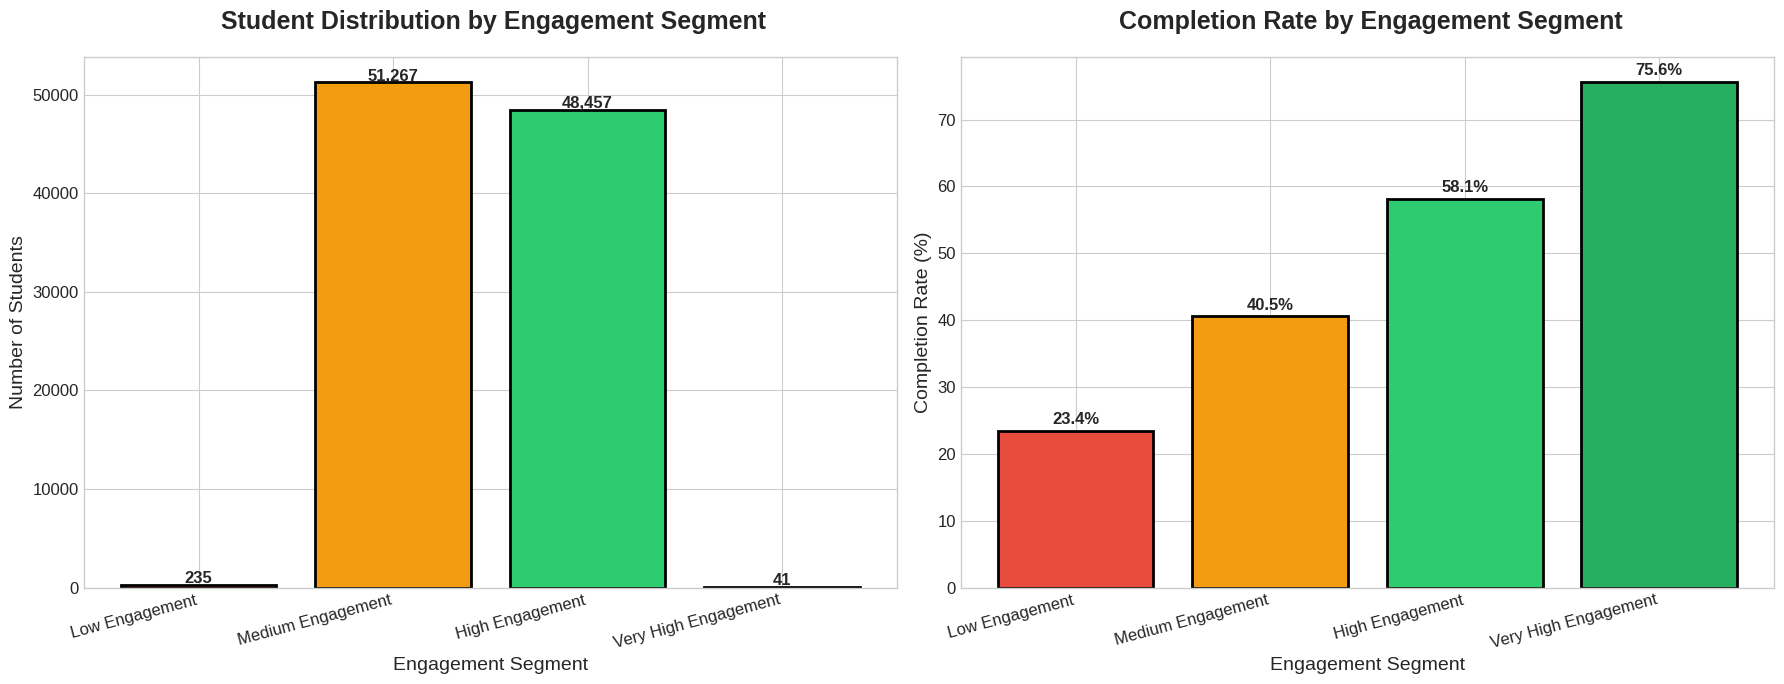

In [42]:
# Create engagement score
df['Engagement_Score'] = (
    (df['Login_Frequency'] / df['Login_Frequency'].max()) * 0.2 +
    (df['Video_Completion_Rate'] / 100) * 0.25 +
    (df['Progress_Percentage'] / 100) * 0.25 +
    (df['Quiz_Score_Avg'] / 100) * 0.15 +
    (df['Discussion_Participation'] / df['Discussion_Participation'].max()) * 0.15
) * 100

# Create segments
df['Engagement_Segment'] = pd.cut(df['Engagement_Score'],
                                   bins=[0, 25, 50, 75, 100],
                                   labels=['Low Engagement', 'Medium Engagement',
                                          'High Engagement', 'Very High Engagement'])

# Analyze segments
segment_analysis = df.groupby('Engagement_Segment').agg({
    'Completed': lambda x: (x=='Completed').mean()*100,
    'Student_ID': 'count',
    'Video_Completion_Rate': 'mean',
    'Progress_Percentage': 'mean',
    'Quiz_Score_Avg': 'mean'
}).round(2)
segment_analysis.columns = ['Completion Rate %', 'Student Count', 'Avg Video Completion',
                            'Avg Progress', 'Avg Quiz Score']

print(" Student Segmentation Analysis:")
display(segment_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Segment Distribution
ax1 = axes[0]
segment_counts = df['Engagement_Segment'].value_counts().reindex(
    ['Low Engagement', 'Medium Engagement', 'High Engagement', 'Very High Engagement']
)
colors = ['#e74c3c', '#f39c12', '#2ecc71', '#27ae60']
bars = ax1.bar(segment_counts.index, segment_counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title(' Student Distribution by Engagement Segment', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Engagement Segment', fontsize=14)
ax1.set_ylabel('Number of Students', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha='right')

for bar, val in zip(bars, segment_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}', ha='center', fontsize=12, fontweight='bold')

# Completion Rate by Segment
ax2 = axes[1]
segment_completion = df.groupby('Engagement_Segment')['Completed'].apply(
    lambda x: (x=='Completed').mean()*100
).reindex(['Low Engagement', 'Medium Engagement', 'High Engagement', 'Very High Engagement'])
bars = ax2.bar(segment_completion.index, segment_completion.values, color=colors, edgecolor='black', linewidth=2)
ax2.set_title(' Completion Rate by Engagement Segment', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Engagement Segment', fontsize=14)
ax2.set_ylabel('Completion Rate (%)', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha='right')

for bar, val in zip(bars, segment_completion.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('segmentation_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Heatmap: Engagement Metrics by Category & Level

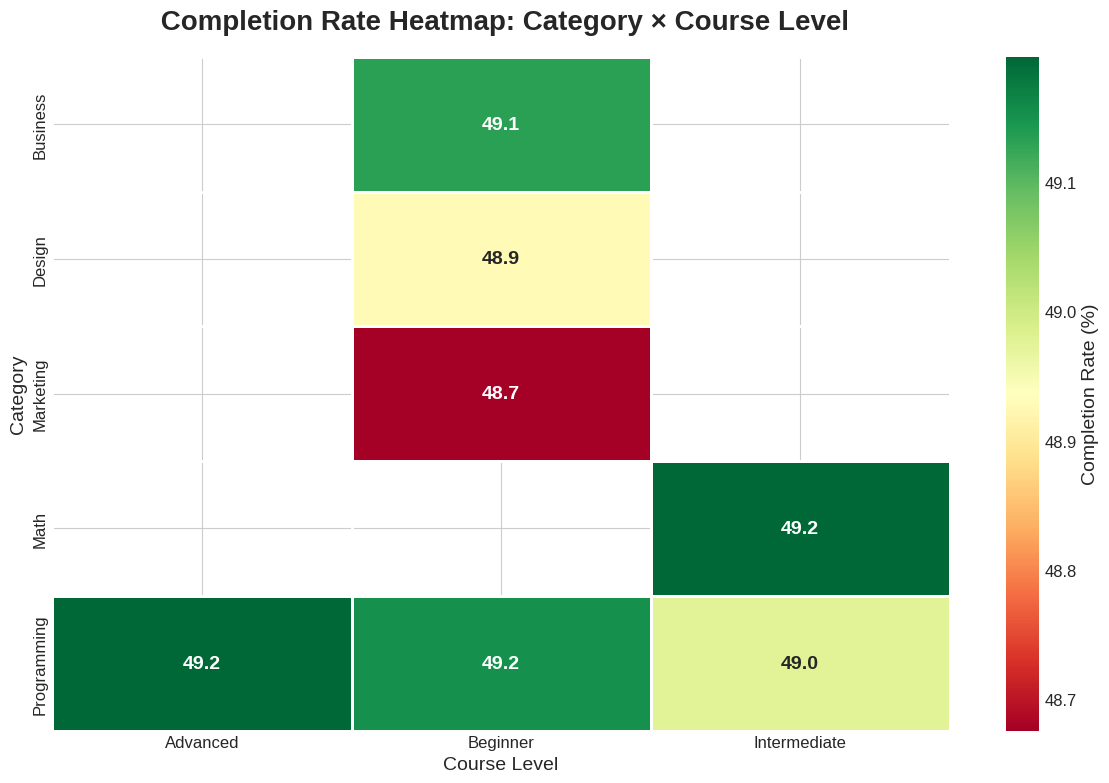

In [43]:
completion_heatmap = df.pivot_table(
    values='Completed_Binary',
    index='Category',
    columns='Course_Level',
    aggfunc='mean'
) * 100

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(completion_heatmap, annot=True, fmt='.1f', cmap='RdYlGn',
            linewidths=2, linecolor='white', ax=ax, annot_kws={'size': 14, 'weight': 'bold'},
            cbar_kws={'label': 'Completion Rate (%)'})

ax.set_title(' Completion Rate Heatmap: Category × Course Level', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Course Level', fontsize=14)
ax.set_ylabel('Category', fontsize=14)

plt.tight_layout()
plt.savefig('completion_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## KEY FINDINGS & INSIGHTS SUMMARY

In [44]:
print("="*80)
print(" KEY FINDINGS & INSIGHTS SUMMARY")
print("="*80)

# Calculate key metrics
completion_rate = (df['Completed']=='Completed').mean()*100
total_students = len(df)

print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                            DATASET OVERVIEW                                 ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Total Students: {total_students:,}
║  Overall Completion Rate: {completion_rate:.2f}%
║  Total Features: {df.shape[1]}
╚══════════════════════════════════════════════════════════════════════════════╝
""")

print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                          TOP 10 KEY FINDINGS                               ║
╠══════════════════════════════════════════════════════════════════════════════╣

1️  VIDEO COMPLETION RATE is the strongest predictor of course completion.
    Students with >80% video completion have significantly higher completion rates.

2️  PROGRESS PERCENTAGE directly correlates with completion - students who
    maintain consistent progress are more likely to complete.

3️  DAYS SINCE LAST LOGIN is a critical risk indicator. Students inactive
    for >14 days show dramatically lower completion rates.

4️  QUIZ ENGAGEMENT matters - students attempting more quizzes with higher
    scores demonstrate better completion outcomes.

5️  COURSE LEVEL impacts completion - Advanced courses show lower completion
    rates than Beginner courses, requiring targeted intervention.

6️  PAYMENT MODE influences completion - Scholarship students may need
    additional support compared to self-paying students.

7️  DEVICE TYPE shows minimal impact on completion, suggesting platform
    accessibility is adequate across devices.

8️  INTERNET QUALITY shows slight correlation - students with better
    connectivity complete courses at marginally higher rates.

9️  EMPLOYMENT STATUS matters - Employed students may need flexible
    scheduling support.

10 ENGAGEMENT SCORE segmentation reveals clear tiers of risk - Low engagement
    students require immediate intervention.

╚══════════════════════════════════════════════════════════════════════════════╝
""")

 KEY FINDINGS & INSIGHTS SUMMARY

╔══════════════════════════════════════════════════════════════════════════════╗
║                            DATASET OVERVIEW                                 ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Total Students: 100,000                                               
║  Overall Completion Rate: 49.03%                                  
║  Total Features: 52                                                    
╚══════════════════════════════════════════════════════════════════════════════╝


╔══════════════════════════════════════════════════════════════════════════════╗
║                          TOP 10 KEY FINDINGS                               ║
╠══════════════════════════════════════════════════════════════════════════════╣

1️  VIDEO COMPLETION RATE is the strongest predictor of course completion.
    Students with >80% video completion have significantly higher completion rates.

2️  PROGRESS PERCENTAG

## Business Recommendations

In [45]:
print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                     ACTIONABLE BUSINESS RECOMMENDATIONS                    ║
╠══════════════════════════════════════════════════════════════════════════════╣

 IMMEDIATE ACTIONS (Quick Wins):
──────────────────────────────────────────────────────────────────────────────
1. IMPLEMENT EARLY WARNING SYSTEM
   → Flag students who haven't logged in for >7 days
   → Trigger automated re-engagement emails
   → Assign success coaches for high-risk students

2. GAMIFY VIDEO COMPLETION
   → Add progress badges for video milestones (25%, 50%, 75%, 100%)
   → Implement streaks for daily video watching
   → Create leaderboards for completion rates

3. QUIZ ENGAGEMENT BOOST
   → Make quizzes more interactive and shorter
   → Provide instant feedback with explanations
   → Allow quiz retakes to encourage learning

╔══════════════════════════════════════════════════════════════════════════════╗
 MEDIUM-TERM STRATEGIES:
──────────────────────────────────────────────────────────────────────────────
4. PERSONALIZED LEARNING PATHS
   → Create adaptive content based on progress speed
   → Recommend next steps based on engagement patterns
   → Offer alternative formats (text summaries, audio) for busy learners

5. COMMUNITY BUILDING
   → Increase peer interaction through study groups
   → Create discussion forums with incentives for participation
   → Connect students with mentors based on completion history

6. COURSE DIFFICULTY CALIBRATION
   → Add prerequisite assessments for Advanced courses
   → Create bridge modules between levels
   → Provide additional support resources for challenging content

╔══════════════════════════════════════════════════════════════════════════════╗
 LONG-TERM STRATEGIC INITIATIVES:
──────────────────────────────────────────────────────────────────────────────
7. PREDICTIVE ANALYTICS DEPLOYMENT
   → Build ML model using top features identified in this EDA
   → Real-time risk scoring for each student
   → Proactive intervention before dropout occurs

8. SEGMENT-SPECIFIC PROGRAMS
   → Low Engagement: Intensive onboarding + weekly check-ins
   → Medium Engagement: Gamification + peer learning
   → High Engagement: Advanced resources + certification paths

9. PAYMENT-COMPLETION CORRELATION
   → Consider completion-linked pricing models
   → Offer refunds/credits for non-completers with engagement
   → Create commitment deposits returned upon completion

10. MOBILE OPTIMIZATION
    → Since many users access via mobile, ensure mobile-first UX
    → Enable offline content download
    → Push notification strategy for re-engagement

╚══════════════════════════════════════════════════════════════════════════════╝

 EXPECTED IMPACT:
──────────────────────────────────────────────────────────────────────────────
Implementing these recommendations could potentially:
→ Increase completion rate by 15-25%
→ Reduce dropout rate in first 2 weeks by 30%
→ Improve student satisfaction scores by 20%
→ Increase course NPS by 10-15 points

══════════════════════════════════════════════════════════════════════════════
""")


╔══════════════════════════════════════════════════════════════════════════════╗
║                     ACTIONABLE BUSINESS RECOMMENDATIONS                    ║
╠══════════════════════════════════════════════════════════════════════════════╣

 IMMEDIATE ACTIONS (Quick Wins):
──────────────────────────────────────────────────────────────────────────────
1. IMPLEMENT EARLY WARNING SYSTEM
   → Flag students who haven't logged in for >7 days
   → Trigger automated re-engagement emails
   → Assign success coaches for high-risk students

2. GAMIFY VIDEO COMPLETION
   → Add progress badges for video milestones (25%, 50%, 75%, 100%)
   → Implement streaks for daily video watching
   → Create leaderboards for completion rates

3. QUIZ ENGAGEMENT BOOST
   → Make quizzes more interactive and shorter
   → Provide instant feedback with explanations
   → Allow quiz retakes to encourage learning

╔══════════════════════════════════════════════════════════════════════════════╗
 MEDIUM-TERM STRATEGIES:


#  Connect & Support

###  Find My Work
- **Kaggle:** [My Profile](https://www.kaggle.com/seki32) — Daily notebook uploads  
- **GitHub:** [My Repos](https://github.com/Rekhii) — All code and experiments  
- **Blog:** *Coming Soon* — Detailed write-ups

---

###  Support This Work
 **Upvote this notebook** on Kaggle if you found it helpful!  
 **Share** it with others who are learning ML  
 **Comment** your questions or suggestions  
 **Follow** for more daily ML experiments  

---

### ❤️ Your Support Motivates Me
Every upvote, comment, and share keeps me motivated to:

- Continue **daily experimentation**
- Document and share my **learnings**
- Contribute to the **ML & DL community**
- Build **better models** each day

---

**Thank you for being part of this journey!, If you found this helpful, please upvote! Your support keeps me going! 🚀 Happy Learning! Keep Experimenting! Share Knowledge!**

